In [1]:
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import MinMaxScaler
from sklearn.utils import resample
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split, GridSearchCV ,cross_val_score
from sklearn.metrics import accuracy_score, classification_report ,confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve,auc

# Loading of data 

In [3]:
iphone_data=pd.read_csv("Iphone_purchase.csv")

In [4]:
iphone_data

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


# Preprocessing 

## Dropping 'User ID' as it does not add any value 

In [5]:
iphone_data = iphone_data.drop('User ID', axis=1)
iphone_data_old=iphone_data.copy()
iphone_data

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0
...,...,...,...,...
395,Female,46,41000,1
396,Male,51,23000,1
397,Female,50,20000,1
398,Male,36,33000,0


## Convert categorical data into numeric data


In [6]:
gender={'Male':0,'Female':1}
iphone_data['Gender']=iphone_data['Gender'].map(gender)
iphone_data


,Gender,Age,EstimatedSalary,Purchased
0,0,19,19000,0
1,0,35,20000,0
2,1,26,43000,0
3,1,27,57000,0
4,0,19,76000,0
...,...,...,...,...
395,1,46,41000,1
396,0,51,23000,1
397,1,50,20000,1
398,0,36,33000,0


## Handling missing values if there is any 

In [7]:
iphone_data.isnull().sum()

Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

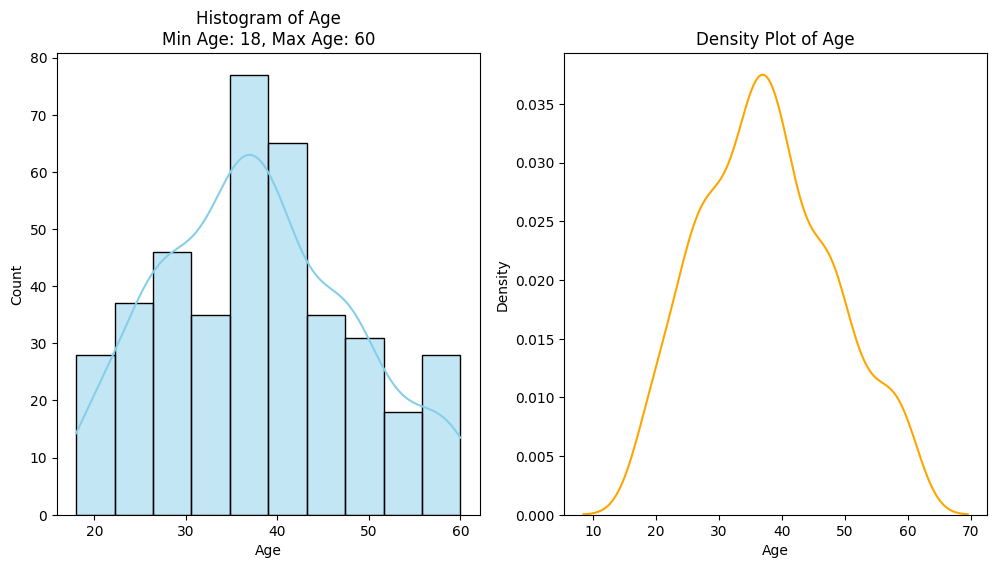

In [8]:
# Calculating min and max age
min_age = iphone_data['Age'].min()
max_age = iphone_data['Age'].max()

# Plotting histogram and density plot for Age
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(iphone_data['Age'], kde=True, color='skyblue')
plt.title(f'Histogram of Age\nMin Age: {min_age}, Max Age: {max_age}')

plt.subplot(1, 2, 2)
sns.kdeplot(iphone_data['Age'], color='orange')
plt.title('Density Plot of Age')
plt.show()

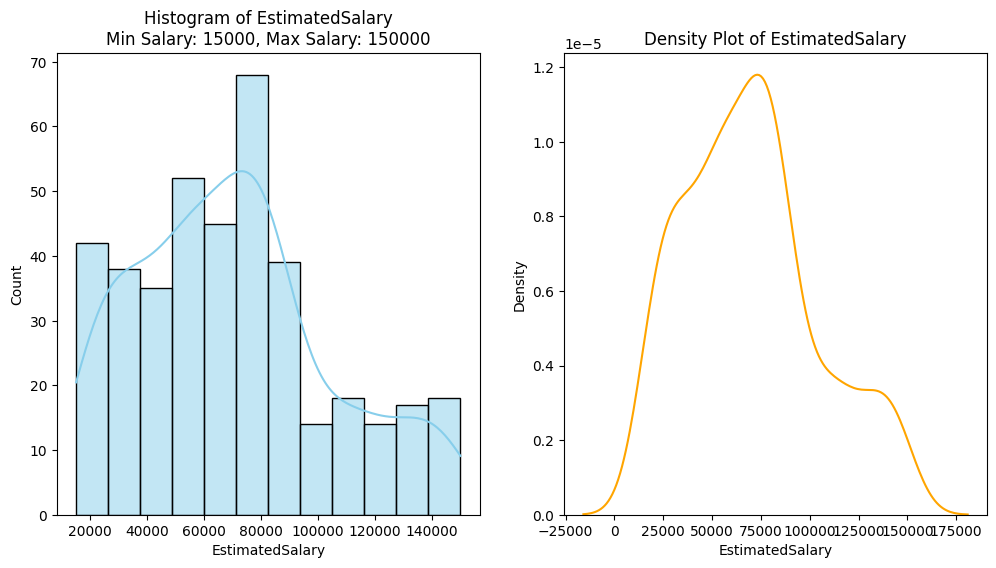

In [9]:
# Calculating min and max salary
min_salary = iphone_data['EstimatedSalary'].min()
max_salary = iphone_data['EstimatedSalary'].max()

# Plotting histogram and density plot for EstimatedSalary
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(iphone_data['EstimatedSalary'], kde=True, color='skyblue')
plt.title(f'Histogram of EstimatedSalary\nMin Salary: {min_salary}, Max Salary: {max_salary}')
plt.subplot(1, 2, 2)
sns.kdeplot(iphone_data['EstimatedSalary'], color='orange')
plt.title('Density Plot of EstimatedSalary')
plt.show()

___________________________________________________________________________

## Detecting outliers 

Since the data are not normally distributed (different ranges , IQR method is used )

In [10]:
# Convert to DataFrame
df = pd.DataFrame(iphone_data)

# Extract numeric columns
numeric_cols = ['Age', 'EstimatedSalary']
numeric_data = df[numeric_cols]

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = numeric_data.quantile(0.25)
Q3 = numeric_data.quantile(0.75)

# Calculate IQR (Interquartile Range)
IQR = Q3 - Q1

# Define threshold for identifying outliers
threshold = 1.5

# Identify outliers
outliers = ((numeric_data < (Q1 - threshold * IQR)) | (numeric_data > (Q3 + threshold * IQR))).any(axis=1)
num_outliers = outliers.sum()
print("The number of outliers detected:" ,num_outliers)

The number of outliers detected: 0


### Box plot 

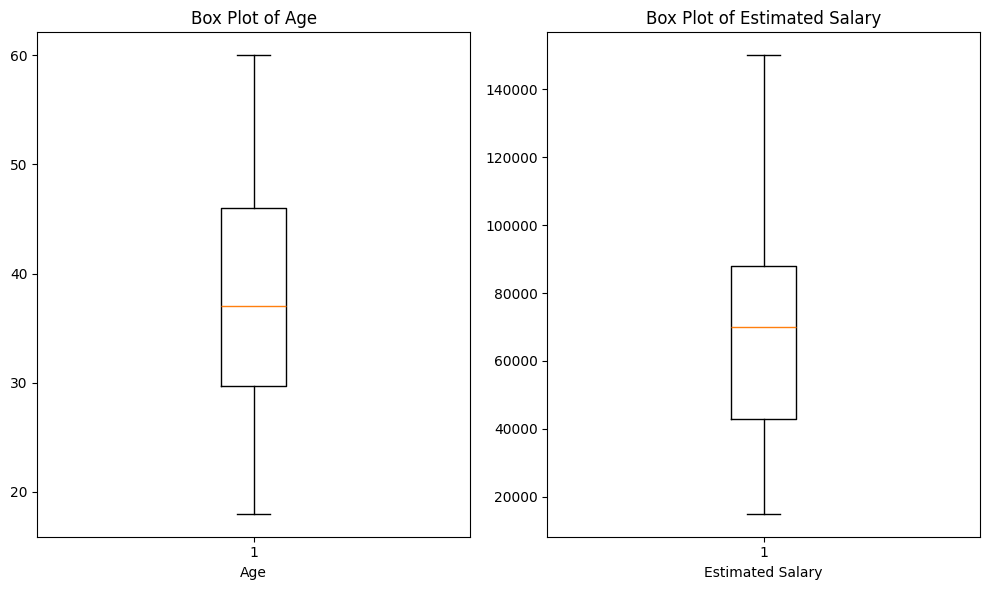

Number of outliers : 0


In [11]:
# Set matplotlib to inline mode
%matplotlib inline

# Visualization
plt.figure(figsize=(10, 6))

# Box plot for Age
plt.subplot(1, 2, 1)
plt.boxplot(df['Age'])
plt.title('Box Plot of Age')
plt.xlabel('Age')

# Box plot for EstimatedSalary
plt.subplot(1, 2, 2)
plt.boxplot(df['EstimatedSalary'])
plt.title('Box Plot of Estimated Salary')
plt.xlabel('Estimated Salary')

plt.tight_layout()
plt.show()

print("Number of outliers :", num_outliers)

## Normalization 

In [12]:
iphone_data_normalized=iphone_data.copy()
# Extract numeric columns
numeric_cols = ['Age','EstimatedSalary']
numeric_data = iphone_data[numeric_cols]

# Apply min-max normalization
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(numeric_data)
scaled_df = pd.DataFrame(scaled_data, columns=numeric_cols)
iphone_data_normalized[numeric_cols] = scaled_df
iphone_data_normalized

,Gender,Age,EstimatedSalary,Purchased
0,0,0.023810,0.029630,0
1,0,0.404762,0.037037,0
2,1,0.190476,0.207407,0
3,1,0.214286,0.311111,0
4,0,0.023810,0.451852,0
...,...,...,...,...
395,1,0.666667,0.192593,1
396,0,0.785714,0.059259,1
397,1,0.761905,0.037037,1
398,0,0.428571,0.133333,0


__________________________________________________________________________
## Bar plot of Gender

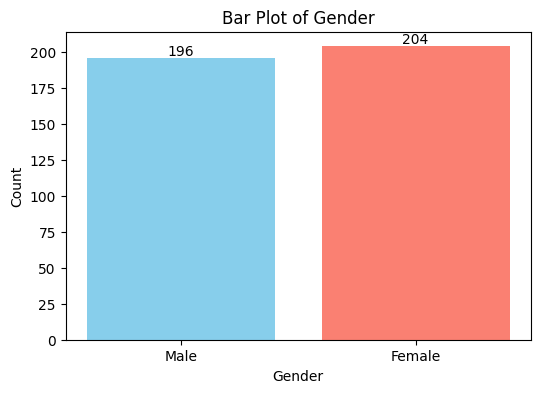

In [13]:
# Create a figure and set its size
plt.figure(figsize=(6, 4))

# Bar plot for Gender
bars =plt.bar(df['Gender'].value_counts().index, df['Gender'].value_counts().values, color=['salmon', 'skyblue'])

# Set x-axis tick labels
plt.xticks([0, 1], ['Male', 'Female'])


# Annotate each bar with its count
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), 
             str(int(bar.get_height())), ha='center', va='bottom')

plt.title('Bar Plot of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')

plt.show()

<h3> We can see that the distrbution of males and females are balanced </h3>

__________________________________________________________
## Correlation matrix 

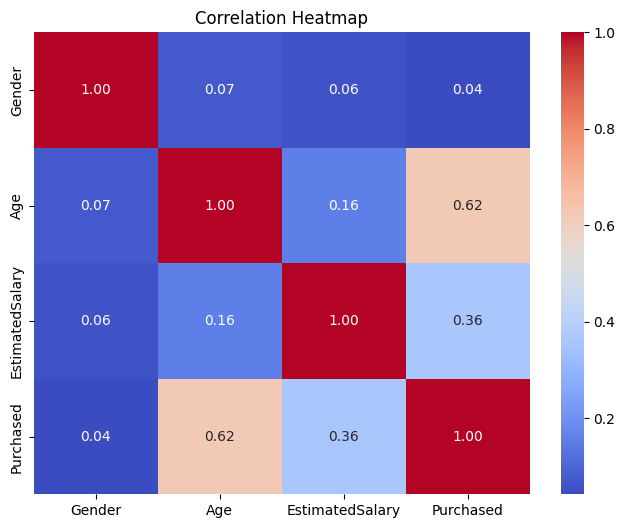

In [14]:
# Calculate correlation matrix
corr_matrix = df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

<b>The correlation matrix reveals a noteworthy association between Age and Purchased, the classifier attribute. This association suggests a strong relationship between the age of the individuals and their purchasing behavior, indicating that age might be a significant predictor of purchase decisions </b>
________________________



<h3> Plotting histogram to compare the distribution of Age for 
    individuals who made a purchase ('Purchased') and those who did not ('Not Purchased').
</h3>

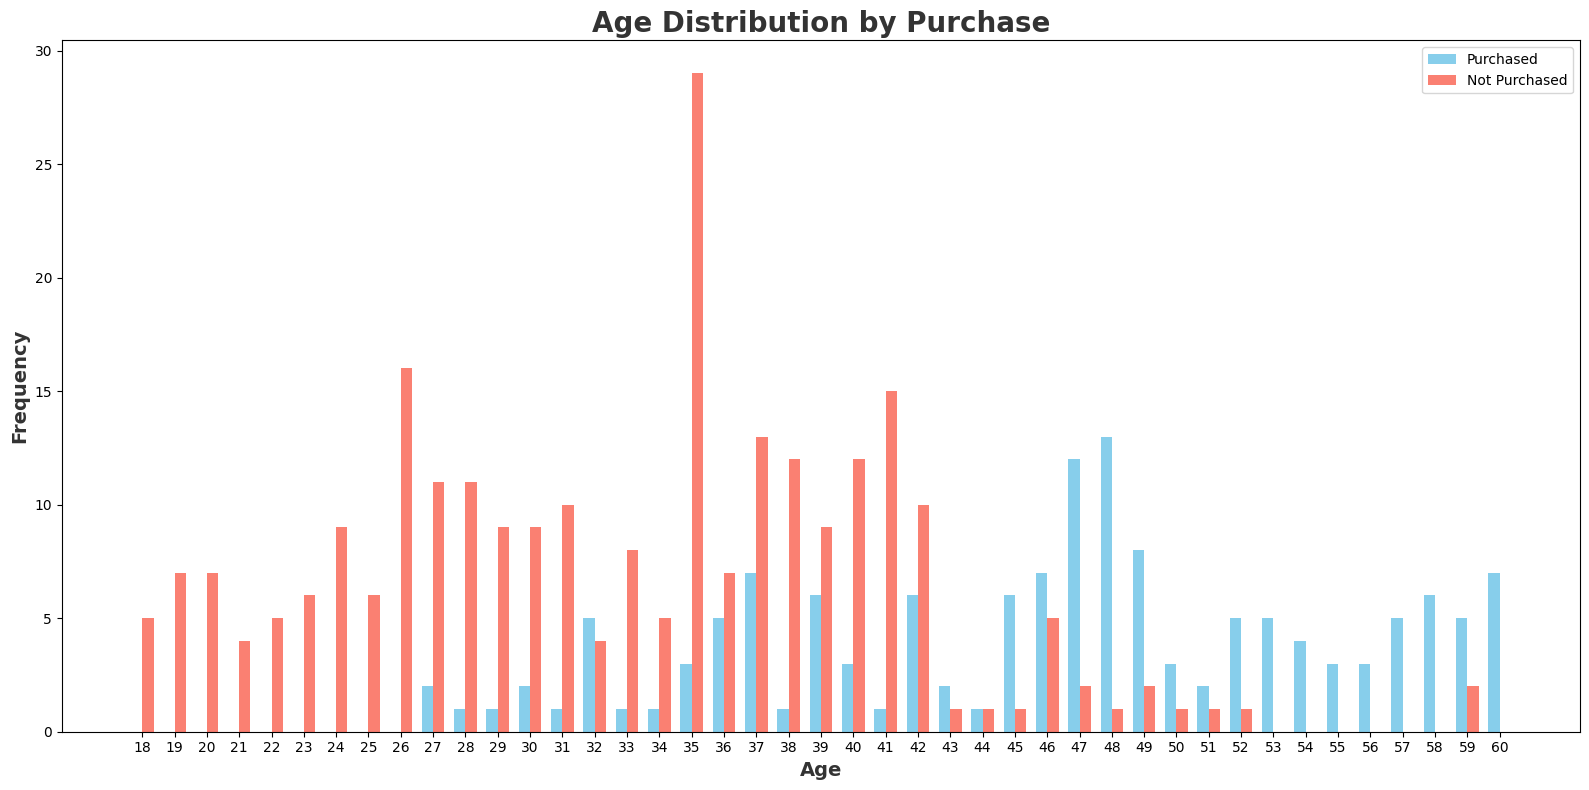

In [15]:
# Group the data by Age and Purchased, and count the occurrences
purchase_counts = iphone_data.groupby(['Age', 'Purchased']).size().unstack(fill_value=0)

# Calculate the number of age groups
num_ages = len(purchase_counts)

# Define the width of each bar
bar_width = 0.35

# Plotting
plt.figure(figsize=(16, 8))  # Enlarge the figure size for better visibility
ages = np.arange(num_ages)
purchased = plt.bar(ages, purchase_counts[1], width=bar_width, color='skyblue', label='Purchased')
not_purchased = plt.bar(ages + bar_width, purchase_counts[0], width=bar_width, color='salmon', label='Not Purchased')

# Title and labels
plt.title('Age Distribution by Purchase', fontsize=20, fontweight='bold', color='#333333')
plt.xlabel('Age', fontsize=14, fontweight='bold', color='#333333')
plt.ylabel('Frequency', fontsize=14, fontweight='bold', color='#333333')

# Set x-axis ticks and labels
plt.xticks(ages + bar_width / 2, purchase_counts.index)

# Legend
plt.legend()

# Show plot
plt.tight_layout()
plt.show()


<b>Upon reviewing the correlation matrix, a notable pattern emerges regarding the influence of age on purchasing behavior. Specifically, individuals aged over 43 exhibit a higher propensity for making purchases, while those under 42 show a lower likelihood of purchasing. This observation underscores the significant impact of age on consumer behavior, suggesting that age can serve as a key determinant in predicting purchasing decisions </b>
_____________________________________________________________

In [16]:
# Define new age groups
bins = [0, 43, float('inf')]  # Define the new age group boundaries

labels = ['<43','>=43'] 
# Create a new column for the new age groups
iphone_data['AgeGroup'] = pd.cut(iphone_data['Age'], bins=bins, labels=labels, right=False)

# Convert the new age groups to one-hot encoding
new_age_groups_encoded = pd.get_dummies(iphone_data['AgeGroup'], prefix='AgeGroup')

# Concatenate the one-hot encoded new age groups with the original dataset
iphone_data = pd.concat([iphone_data, new_age_groups_encoded], axis=1)

# Drop the original 'Age' and 'NewAgeGroup' columns
iphone_data.drop(['Age', 'AgeGroup'], axis=1, inplace=True)
iphone_data


,Gender,EstimatedSalary,Purchased,AgeGroup_<43,AgeGroup_>=43
0,0,19000,0,True,False
1,0,20000,0,True,False
2,1,43000,0,True,False
3,1,57000,0,True,False
4,0,76000,0,True,False
...,...,...,...,...,...
395,1,41000,1,False,True
396,0,23000,1,False,True
397,1,20000,1,False,True
398,0,33000,0,True,False


________________________

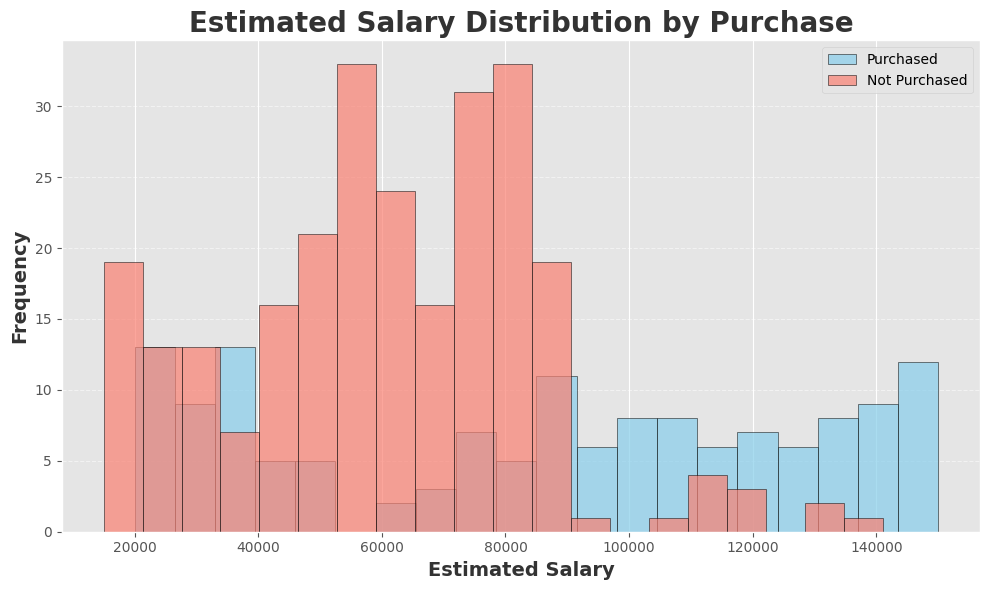

In [17]:
# Separate data for purchased and not purchased
purchased_salary = iphone_data[iphone_data['Purchased'] == 1]['EstimatedSalary']
not_purchased_salary = iphone_data[iphone_data['Purchased'] == 0]['EstimatedSalary']

# Set up the plot
plt.figure(figsize=(10, 6))
plt.style.use('ggplot')  # Set the style to 'ggplot' for a visually pleasing appearance

# Plot histograms for purchased and not purchased
plt.hist(purchased_salary, bins=20, color='skyblue', edgecolor='black', alpha=0.7, label='Purchased')
plt.hist(not_purchased_salary, bins=20, color='salmon', edgecolor='black', alpha=0.7, label='Not Purchased')

# Title
plt.title('Estimated Salary Distribution by Purchase', fontsize=20, fontweight='bold', color='#333333')  # Title font size, weight, and color

# Labels
plt.xlabel('Estimated Salary', fontsize=14, fontweight='bold', color='#333333')  # X-axis label font size, weight, and color
plt.ylabel('Frequency', fontsize=14, fontweight='bold', color='#333333')  # Y-axis label font size, weight, and color

# Grid
plt.grid(axis='y', linestyle='--', alpha=0.5)  # Add grid lines with a slight transparency

# Legend
plt.legend()

plt.tight_layout()  # Adjust layout to prevent overlapping elements
plt.show()


In [18]:
salary_bins = [0, 90000, float('inf')]
salary_labels = ['<90000', '>=90000',]


# Create a new column for salary groups
iphone_data['SalaryGroup'] = pd.cut(iphone_data['EstimatedSalary'], bins=salary_bins, labels=salary_labels, right=False)

# Convert salary groups to one-hot encoding
salary_groups_encoded = pd.get_dummies(iphone_data['SalaryGroup'], prefix='SalaryGroup')

# Concatenate the one-hot encoded salary groups with the original dataset
iphone_data = pd.concat([iphone_data, salary_groups_encoded], axis=1)

# Drop the original 'EstimatedSalary' and 'SalaryGroup' columns
iphone_data.drop(['EstimatedSalary', 'SalaryGroup'], axis=1, inplace=True)

iphone_data

,Gender,Purchased,AgeGroup_<43,AgeGroup_>=43,SalaryGroup_<90000,SalaryGroup_>=90000
0,0,0,True,False,True,False
1,0,0,True,False,True,False
2,1,0,True,False,True,False
3,1,0,True,False,True,False
4,0,0,True,False,True,False
...,...,...,...,...,...,...
395,1,1,False,True,True,False
396,0,1,False,True,True,False
397,1,1,False,True,True,False
398,0,0,True,False,True,False


### Convert 'False' and 'True' to 0 and 1 in all columns

In [19]:
iphone_data = iphone_data.astype(int)
iphone_data

,Gender,Purchased,AgeGroup_<43,AgeGroup_>=43,SalaryGroup_<90000,SalaryGroup_>=90000
0,0,0,1,0,1,0
1,0,0,1,0,1,0
2,1,0,1,0,1,0
3,1,0,1,0,1,0
4,0,0,1,0,1,0
...,...,...,...,...,...,...
395,1,1,0,1,1,0
396,0,1,0,1,1,0
397,1,1,0,1,1,0
398,0,0,1,0,1,0


In [20]:
iphone_data.drop(['SalaryGroup_<90000', 'AgeGroup_<43'], axis=1, inplace=True)
iphone_data

,Gender,Purchased,AgeGroup_>=43,SalaryGroup_>=90000
0,0,0,0,0
1,0,0,0,0
2,1,0,0,0
3,1,0,0,0
4,0,0,0,0
...,...,...,...,...
395,1,1,1,0
396,0,1,1,0
397,1,1,1,0
398,0,0,0,0


## Check for Balance in data 

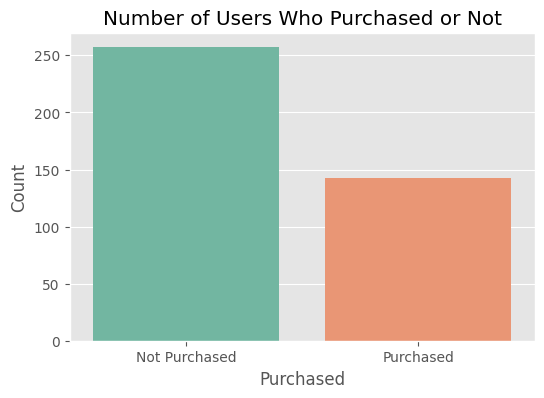

Purchased
0    257
1    143
Name: count, dtype: int64

In [21]:
# Count the occurrences of each class in the "Purchased" feature
purchased_counts = iphone_data['Purchased'].value_counts()
# Plot the count plot
plt.figure(figsize=(6, 4))
sns.countplot(x='Purchased', data=iphone_data, palette='Set2')
plt.xlabel('Purchased')
plt.ylabel('Count')
plt.title('Number of Users Who Purchased or Not')
plt.xticks(ticks=[0, 1], labels=['Not Purchased', 'Purchased'])
plt.show()

# Show the class distribution
class_distribution = iphone_data['Purchased'].value_counts()
class_distribution

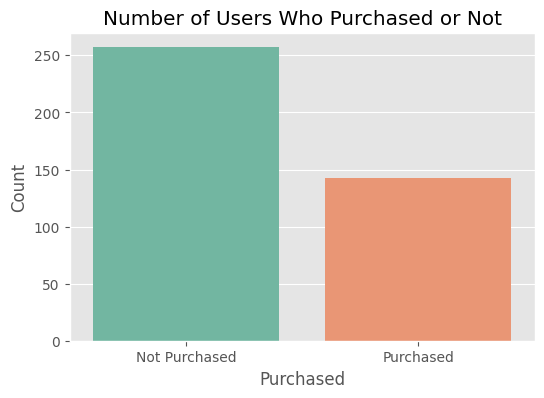

Purchased
0    257
1    143
Name: count, dtype: int64

In [22]:
# Count the occurrences of each class in the "Purchased" feature
purchased_counts = iphone_data_normalized['Purchased'].value_counts()

# Plot the count plot
plt.figure(figsize=(6, 4))
sns.countplot(x='Purchased', data=iphone_data_normalized, palette='Set2')
plt.xlabel('Purchased')
plt.ylabel('Count')
plt.title('Number of Users Who Purchased or Not')
plt.xticks(ticks=[0, 1], labels=['Not Purchased', 'Purchased'])
plt.show()

# Show the class distribution
class_distribution = iphone_data['Purchased'].value_counts()
class_distribution

### Balancing the data 

In [23]:
# Separate majority and minority classes
majority_class = iphone_data[iphone_data['Purchased'] == 0]
minority_class = iphone_data[iphone_data['Purchased'] == 1]

# Perform oversampling on the minority class
minority_upsampled = resample(minority_class,
                              replace=True,  # Sample with replacement
                              n_samples=len(majority_class),  # Match majority class size
                              random_state=42)  # Seed for reproducibility

# Combine the oversampled minority class with the majority class
balanced_data = pd.concat([majority_class, minority_upsampled])

# Shuffle the balanced data
balanced_data = balanced_data.sample(frac=1, random_state=42).reset_index(drop=True)

print("After oversampling, the balanced data class distribution is:")
print(balanced_data['Purchased'].value_counts())



After oversampling, the balanced data class distribution is:
Purchased
1    257
0    257
Name: count, dtype: int64


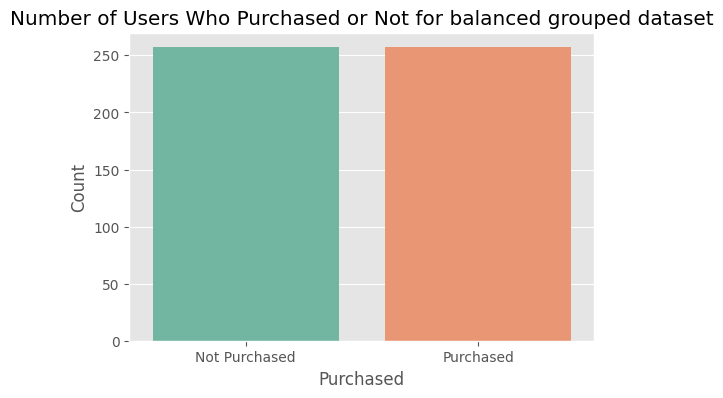

Purchased
1    257
0    257
Name: count, dtype: int64

In [24]:
# Count the occurrences of each class in the "Purchased" feature
purchased_counts = balanced_data['Purchased'].value_counts()
# Plot the count plot
plt.figure(figsize=(6, 4))
sns.countplot(x='Purchased', data=balanced_data, palette='Set2')
plt.xlabel('Purchased')
plt.ylabel('Count')
plt.title('Number of Users Who Purchased or Not for balanced grouped dataset')
plt.xticks(ticks=[0, 1], labels=['Not Purchased', 'Purchased'])
plt.show()

# Show the class distribution
class_distribution = balanced_data['Purchased'].value_counts()
class_distribution

After oversampling, the balanced data class distribution is:
Purchased
1    257
0    257
Name: count, dtype: int64


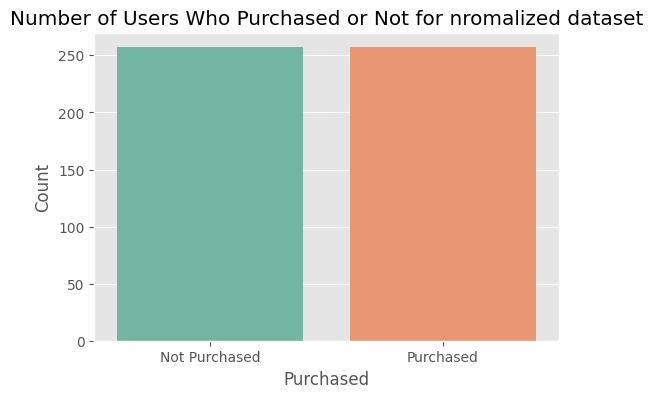

Purchased
1    257
0    257
Name: count, dtype: int64

In [25]:
# Separate majority and minority classes
majority_class = iphone_data_normalized[iphone_data_normalized['Purchased'] == 0]
minority_class = iphone_data_normalized[iphone_data_normalized['Purchased'] == 1]

# Perform oversampling on the minority class
minority_upsampled = resample(minority_class,
                              replace=True,  # Sample with replacement
                              n_samples=len(majority_class),  # Match majority class size
                              random_state=42)  # Seed for reproducibility

# Combine the oversampled minority class with the majority class
iphone_data_normalized = pd.concat([majority_class, minority_upsampled])

# Shuffle the balanced data
iphone_data_normalized = iphone_data_normalized.sample(frac=1, random_state=42).reset_index(drop=True)

print("After oversampling, the balanced data class distribution is:")
print(iphone_data_normalized['Purchased'].value_counts())


# Count the occurrences of each class in the "Purchased" feature
purchased_counts = iphone_data_normalized['Purchased'].value_counts()

# Plot the count plot
plt.figure(figsize=(6, 4))
sns.countplot(x='Purchased', data=iphone_data_normalized, palette='Set2')
plt.xlabel('Purchased')
plt.ylabel('Count')
plt.title('Number of Users Who Purchased or Not for nromalized dataset')
plt.xticks(ticks=[0, 1], labels=['Not Purchased', 'Purchased'])
plt.show()

# Show the class distribution
class_distribution = balanced_data['Purchased'].value_counts()
class_distribution

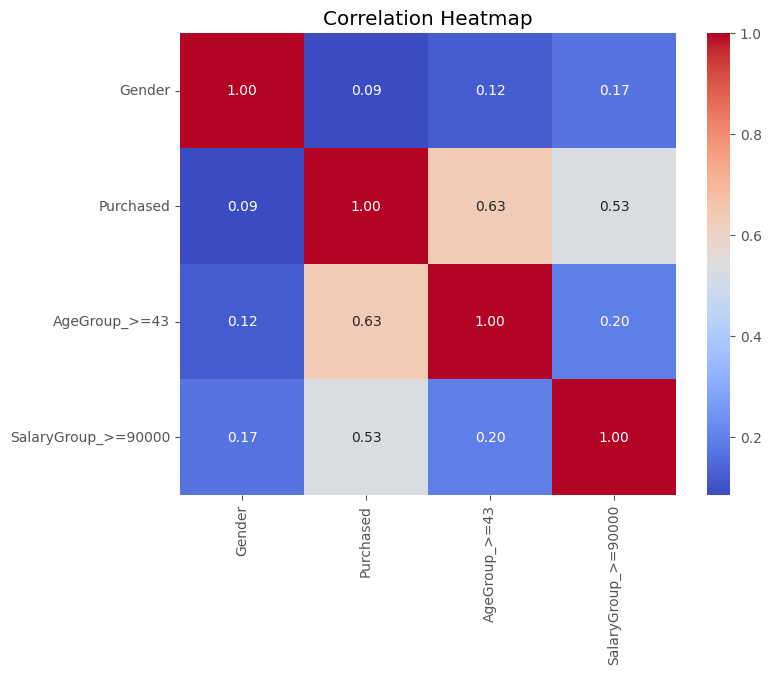

In [26]:
# Calculate correlation matrix
corr_matrix =balanced_data.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [27]:
iphone_data_normalized

,Gender,Age,EstimatedSalary,Purchased
0,0,0.714286,0.192593,1
1,0,0.285714,0.681481,1
2,1,0.714286,0.859259,1
3,0,0.142857,0.059259,0
4,0,0.428571,0.762963,1
...,...,...,...,...
509,0,0.571429,0.370370,0
510,1,0.928571,0.133333,1
511,0,0.738095,0.096296,1
512,0,0.976190,0.851852,1


In [28]:
balanced_data

,Gender,Purchased,AgeGroup_>=43,SalaryGroup_>=90000
0,0,1,1,0
1,0,1,0,1
2,1,1,1,1
3,0,0,0,0
4,0,1,0,1
...,...,...,...,...
509,0,0,0,0
510,1,1,1,0
511,0,1,1,0
512,0,1,1,1


# Phase 1  Models 

## 1) Naive Bayes Classifier

### 1.1 Working with Balanced Dataset which grouping is applied on age and estimated salary 

In [29]:
X = balanced_data.drop(columns=['Purchased'])
y = balanced_data['Purchased']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [30]:
# Create a Gaussian Naive Bayes classifier
nb_clf = GaussianNB()

# Train the classifier
nb_clf.fit(X_train, y_train)

GaussianNB()

In [31]:
# Predicting labels for the training data
y_pred_train = nb_clf.predict(X_train)

# Calculating training accuracy
training_accuracy = accuracy_score(y_train, y_pred_train)
print("Training Accuracy:", training_accuracy)

Training Accuracy: 0.9075425790754258


In [32]:
# Make predictions
y_pred_nb = nb_clf.predict(X_test)

# Evaluate the model
print("Naive Bayes Classifier Performance:")
print("Test Accuracy:", accuracy_score(y_test, y_pred_nb))
print("Classification Report:")
print(classification_report(y_test, y_pred_nb))




Naive Bayes Classifier Performance:
Test Accuracy: 0.941747572815534
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.93      0.95        57
           1       0.92      0.96      0.94        46

    accuracy                           0.94       103
   macro avg       0.94      0.94      0.94       103
weighted avg       0.94      0.94      0.94       103



#### Confusion matrix 

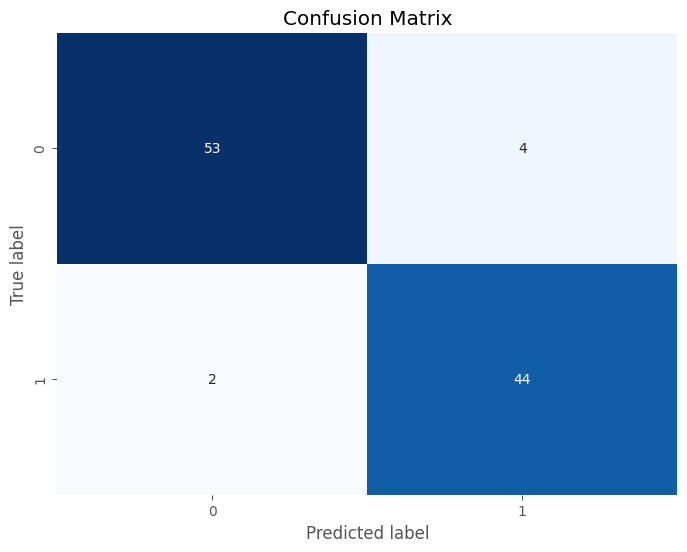

In [33]:
# Assuming y_test and y_pred are the true labels and predictions from the model
cm = confusion_matrix(y_test, y_pred_nb)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

#### Evaluation graphs

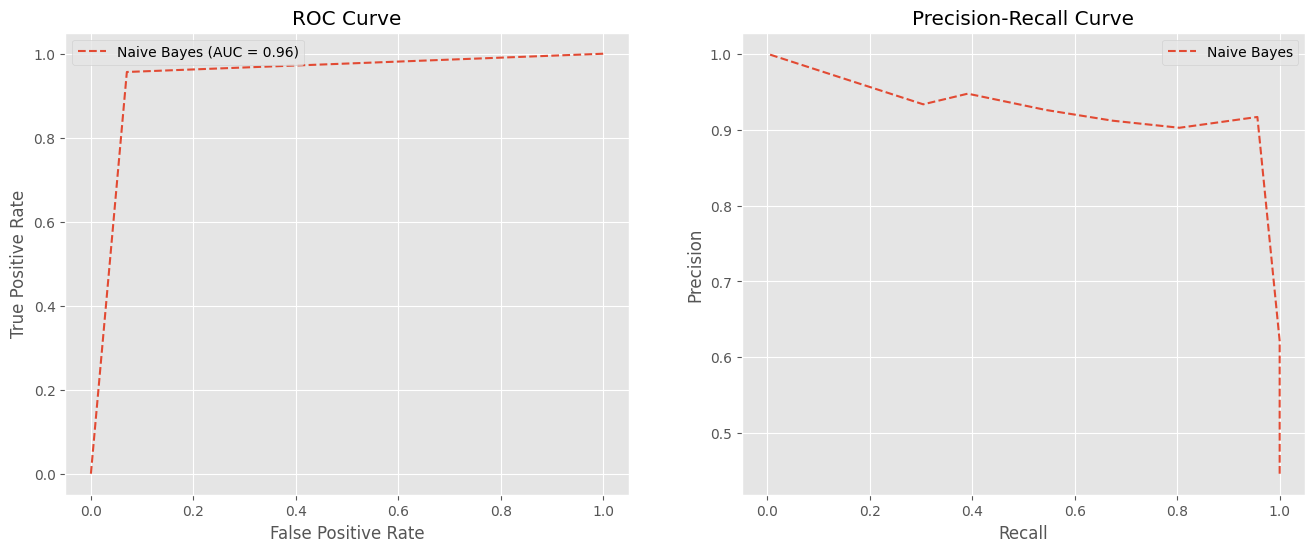

In [34]:
# Calculate ROC curve and AUC for Naive Bayes
nb_probs = nb_clf.predict_proba(X_test)[:, 1]
nb_fpr, nb_tpr, _ = roc_curve(y_test, y_pred_nb)
nb_auc = roc_auc_score(y_test, nb_probs)

# Calculate Precision-Recall curve for Naive Bayes
nb_precision, nb_recall, _ = precision_recall_curve(y_test, nb_probs)

# Plot ROC curve and AUC
plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
plt.plot(nb_fpr, nb_tpr, linestyle='--', label=f'Naive Bayes (AUC = {nb_auc:.2f})')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)

# Plot Precision-Recall curve
plt.subplot(1, 2, 2)
plt.plot(nb_recall, nb_precision, linestyle='--', label='Naive Bayes')
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.grid(True)

plt.show()

#### Applying grid search 

In [35]:
# Define the parameter grid to search over
param_grid = {
    # You can specify the parameters you want to search over and the range of values
    # For example, here we are searching over the 'var_smoothing' parameter
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
}

# Create the grid search object
grid_search = GridSearchCV(nb_clf, param_grid, cv=8, scoring='accuracy')

# Train the grid search object (this will try all combinations of parameters)
grid_search.fit(X_train, y_train)

# Get the best parameters found during the grid search
best_params = grid_search.best_params_
print("Best parameters:", best_params)

# Get the best model found during the grid search
best_nb_clf = grid_search.best_estimator_

# Make predictions with the best model
y_pred_nb = best_nb_clf.predict(X_test)


# Evaluate the model
print("Naive Bayes Classifier Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_nb))
print("Classification Report:")
print(classification_report(y_test, y_pred_nb))

Best parameters: {'var_smoothing': 1e-09}
Naive Bayes Classifier Performance:
Accuracy: 0.941747572815534
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.93      0.95        57
           1       0.92      0.96      0.94        46

    accuracy                           0.94       103
   macro avg       0.94      0.94      0.94       103
weighted avg       0.94      0.94      0.94       103



<b> it gives the same result without grid search <br>

### 1.2 Working with Dataset which is normalized and balanced 

In [36]:
X = iphone_data_normalized.drop(columns=['Purchased'])
y = iphone_data_normalized['Purchased']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [37]:
# Create a Gaussian Naive Bayes classifier
nb_clf = GaussianNB()

# Train the classifier
nb_clf.fit(X_train, y_train)


GaussianNB()

In [38]:
# Predicting labels for the training data
y_pred_train = nb_clf.predict(X_train)

# Calculating training accuracy
training_accuracy = accuracy_score(y_train, y_pred_train)
print("Training Accuracy:", training_accuracy)

Training Accuracy: 0.878345498783455


In [39]:
# Make predictions
y_pred_nb = nb_clf.predict(X_test)

# Evaluate the model
print("Naive Bayes Classifier Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_nb))
print("Classification Report:")
print(classification_report(y_test, y_pred_nb))

Naive Bayes Classifier Performance:
Accuracy: 0.883495145631068
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.88      0.89        57
           1       0.85      0.89      0.87        46

    accuracy                           0.88       103
   macro avg       0.88      0.88      0.88       103
weighted avg       0.88      0.88      0.88       103



#### Confusion matrix 

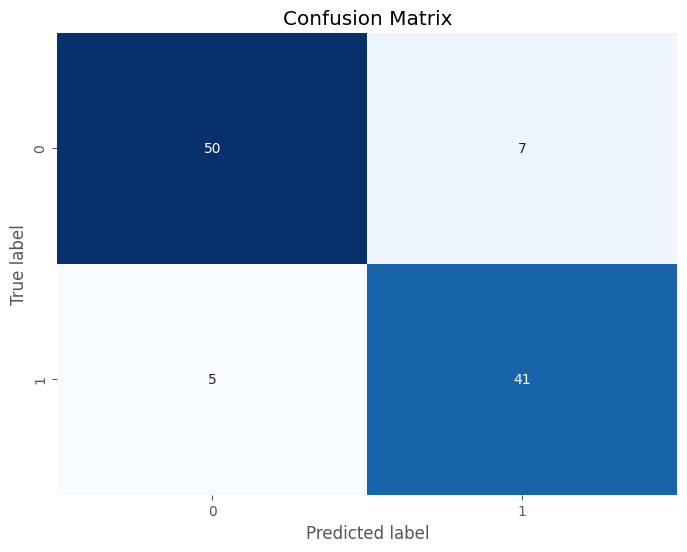

In [40]:
# Assuming y_test and y_pred are the true labels and predictions from the model
cm = confusion_matrix(y_test, y_pred_nb)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

#### Evaluation Graphs

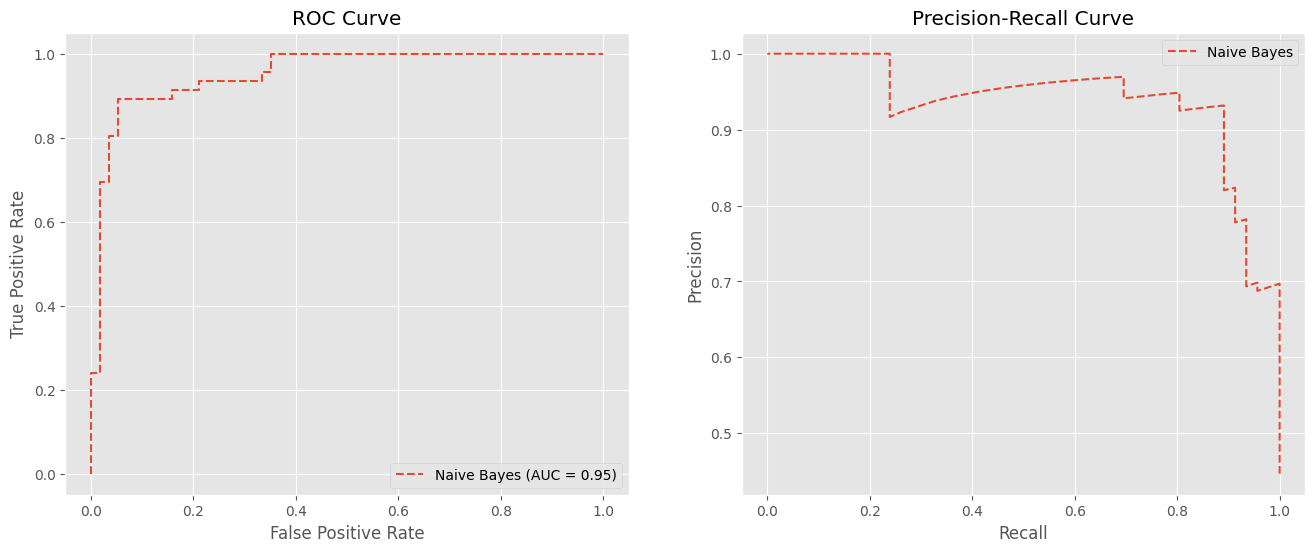

In [41]:
# Calculate ROC curve and AUC for Naive Bayes
nb_probs = nb_clf.predict_proba(X_test)[:, 1]
nb_fpr, nb_tpr, _ = roc_curve(y_test, nb_probs)
nb_auc = roc_auc_score(y_test, nb_probs)

# Calculate Precision-Recall curve for Naive Bayes
nb_precision, nb_recall, _ = precision_recall_curve(y_test, nb_probs)

# Plot ROC curve and AUC
plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
plt.plot(nb_fpr, nb_tpr, linestyle='--', label=f'Naive Bayes (AUC = {nb_auc:.2f})')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)

# Plot Precision-Recall curve
plt.subplot(1, 2, 2)
plt.plot(nb_recall, nb_precision, linestyle='--', label='Naive Bayes')
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.grid(True)

plt.show()

#### Applying grid search 

In [42]:
# Define the parameter grid to search over
param_grid = {
    # You can specify the parameters you want to search over and the range of values
    # For example, here we are searching over the 'var_smoothing' parameter
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
}

# Create the grid search object
grid_search = GridSearchCV(nb_clf, param_grid, cv=15, scoring='accuracy')

# Train the grid search object (this will try all combinations of parameters)
grid_search.fit(X_train, y_train)

# Get the best parameters found during the grid search
best_params = grid_search.best_params_
print("Best parameters:", best_params)

# Get the best model found during the grid search
best_nb_clf = grid_search.best_estimator_

# Make predictions with the best model
y_pred_nb = best_nb_clf.predict(X_test)


# Evaluate the model
print("Naive Bayes Classifier Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_nb))
print("Classification Report:")
print(classification_report(y_test, y_pred_nb))

Best parameters: {'var_smoothing': 1e-09}
Naive Bayes Classifier Performance:
Accuracy: 0.883495145631068
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.88      0.89        57
           1       0.85      0.89      0.87        46

    accuracy                           0.88       103
   macro avg       0.88      0.88      0.88       103
weighted avg       0.88      0.88      0.88       103



<b> it gives the same result without grid search <br>

<b> What is var_smoothing hyperparameter ? </b><br>
When calculating probabilities in GNB, it's common to encounter situations where the variance of a feature is zero. This leads to probabilities being calculated as zero, which in turn can cause issues during classification, especially if the test data contains a value not seen in the training data.

To address this issue, a small value is added to the variance of each feature during calculation to smooth out the probabilities. This small value is controlled by the "var_smoothing" parameter. By default, it is set to 1e-9 in scikit-learn's implementation of GNB, but it can be adjusted if needed.

In summary, "var_smoothing" is a parameter that controls the amount of smoothing applied to the variance of features in GNB, helping to avoid zero probabilities and improving the stability of the model. Adjusting this parameter can sometimes improve the performance of the classifier, especially when dealing with small datasets or features with low variance.

<b> What is grid search ?</b><br>
Grid search is a technique used for hyperparameter optimization, which involves searching for the best combination of hyperparameters for a machine learning model.

 ______________________________________________________________

 ______________________________________________________________

## 2) K-Nearest Neighbors Classifier


### 2.1 Working with Balanced Dataset which grouping is applied on age and estimated salary 

In [43]:
X = balanced_data.drop(columns=['Purchased'])
y = balanced_data['Purchased']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

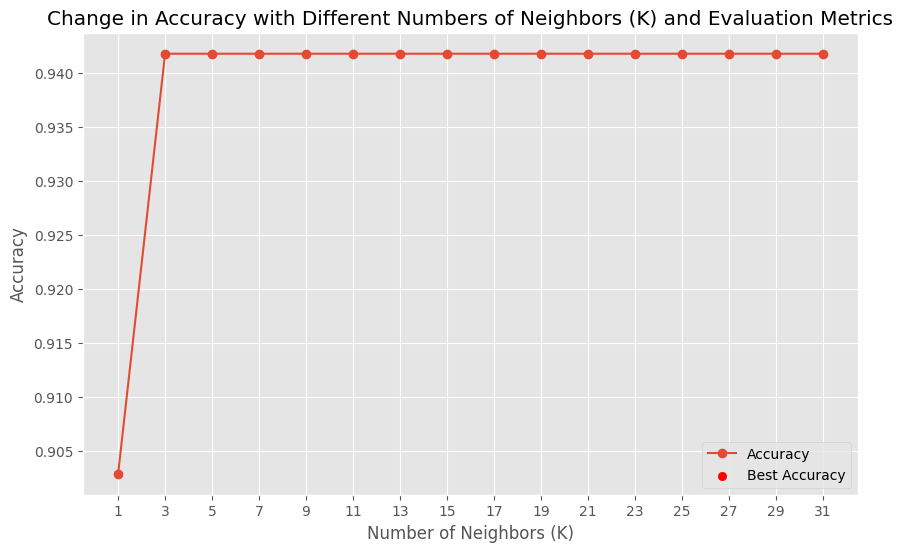

In [44]:
# Define a range of odd k values for KNN
k_values = range(1, 33, 2)  # Try odd values from 1 to 33 neighbors

# Initialize lists to store accuracy scores
knn_accuracies = []
y_pred_knn_list = []

# Iterate over different k values and calculate accuracy for each
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    knn_preds = knn.predict(X_test)
    accuracy = accuracy_score(y_test, knn_preds)
    knn_accuracies.append(accuracy)
    y_pred_knn_list.append(knn_preds)

# Plot the change in accuracy with different k values
plt.figure(figsize=(10, 6))
plt.plot(k_values, knn_accuracies, marker='o', linestyle='-', label='Accuracy')

# Add evaluation metrics for the best KNN model
best_k_idx = np.argmax(knn_accuracies)
best_k = k_values[best_k_idx]
best_accuracy = knn_accuracies[best_k_idx]
best_classification_report = classification_report(y_test, y_pred_knn_list[best_k_idx])

# Plot accuracy value
plt.scatter(best_k, best_accuracy, color='red', label='Best Accuracy')

plt.title('Change in Accuracy with Different Numbers of Neighbors (K) and Evaluation Metrics')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.legend()
plt.grid(True)
plt.show()


In [45]:
# Predicting labels for the training data
y_pred_train = knn.predict(X_train)

# Calculating training accuracy
training_accuracy = accuracy_score(y_train, y_pred_train)
print("Training Accuracy:", training_accuracy)

Training Accuracy: 0.9075425790754258


In [46]:
# Print evaluation metrics
print("\nK-Nearest Neighbors Classifier Performance:")
print("Best K:", best_k)
print("Best Accuracy:", best_accuracy)
print("Classification Report:")
print(best_classification_report)


K-Nearest Neighbors Classifier Performance:
Best K: 3
Best Accuracy: 0.941747572815534
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.93      0.95        57
           1       0.92      0.96      0.94        46

    accuracy                           0.94       103
   macro avg       0.94      0.94      0.94       103
weighted avg       0.94      0.94      0.94       103



### Confusion matrix for KNN 

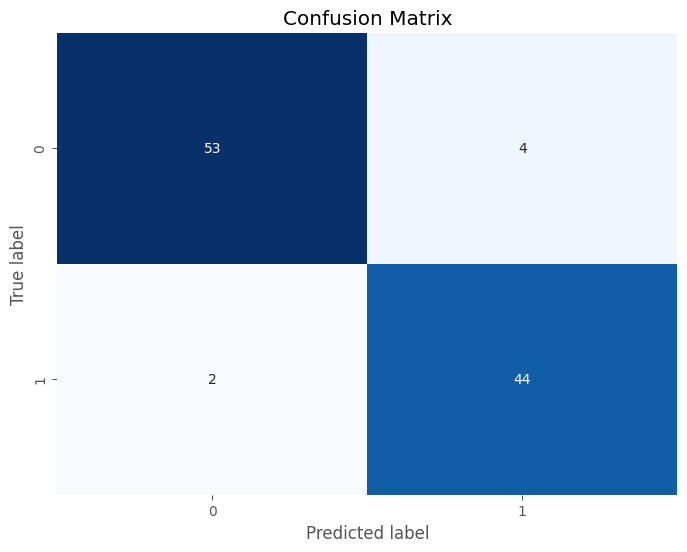

In [47]:
# Compute confusion matrix for the best KNN model
cm = confusion_matrix(y_test, y_pred_knn_list[best_k_idx])

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

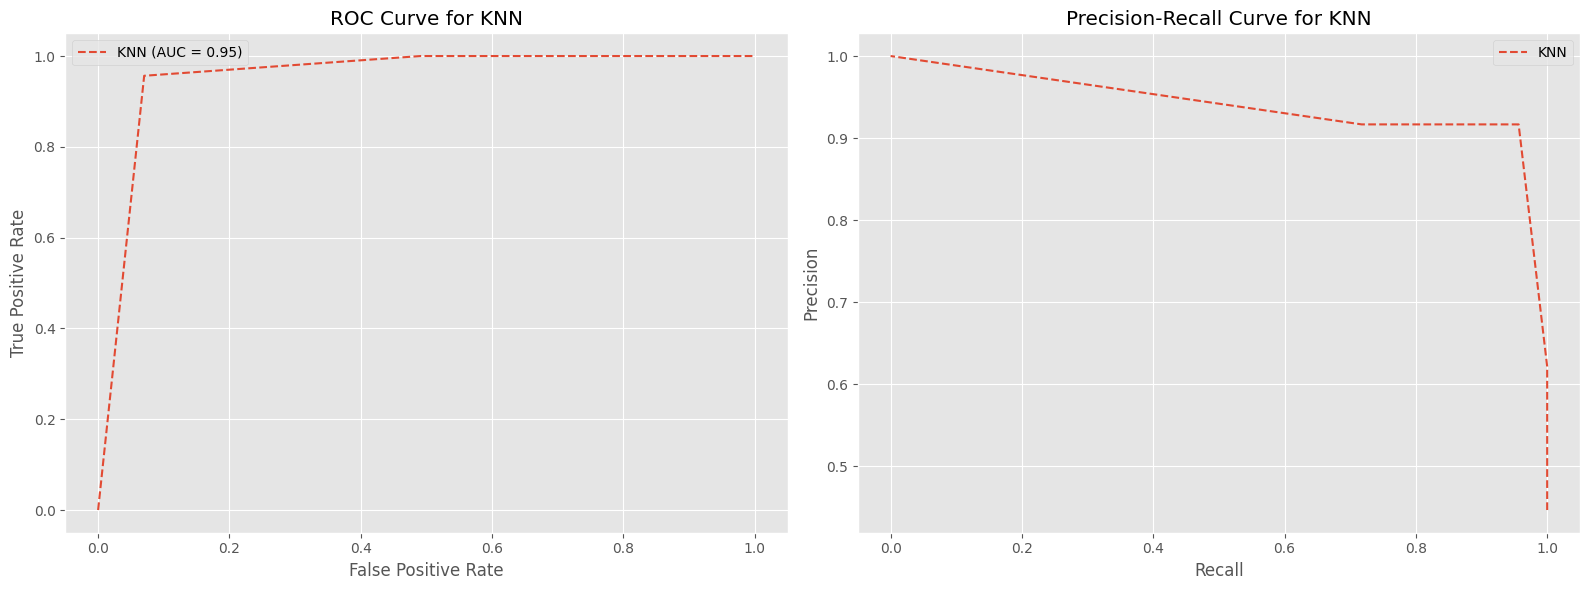

In [48]:
# Instantiate and train KNN classifier with the best k
knn_clf_best = KNeighborsClassifier(n_neighbors=best_k)
knn_clf_best.fit(X_train, y_train)

# Calculate probabilities for KNN
knn_probs = knn_clf_best.predict_proba(X_test)[:, 1]
knn_fpr, knn_tpr, _ = roc_curve(y_test, knn_probs)
knn_auc = roc_auc_score(y_test, knn_probs)

# Calculate Precision-Recall curve for KNN
knn_precision, knn_recall, _ = precision_recall_curve(y_test, knn_probs)

# Plot both ROC curve and Precision-Recall curve for KNN side by side
plt.figure(figsize=(16, 6))

# ROC curve subplot
plt.subplot(1, 2, 1)
plt.plot(knn_fpr, knn_tpr, linestyle='--', label=f'KNN (AUC = {knn_auc:.2f})')
plt.title('ROC Curve for KNN')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)

# Precision-Recall curve subplot
plt.subplot(1, 2, 2)
plt.plot(knn_recall, knn_precision, linestyle='--', label='KNN')
plt.title('Precision-Recall Curve for KNN')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

#### Grid Search

In [49]:
# Define the parameter grid to search over
param_grid = {
    'n_neighbors': [3, 5, 7, 9],  # Number of neighbors to consider
    'weights': ['uniform', 'distance'],  # Weight function used in prediction
    'metric': ['euclidean', 'manhattan']  # Distance metric
}

# Create the KNN classifier
knn_clf = KNeighborsClassifier()

# Create the grid search object
grid_search = GridSearchCV(knn_clf, param_grid, cv=5, scoring='accuracy')

# Train the grid search object (this will try all combinations of parameters)
grid_search.fit(X_train, y_train)

# Get the best parameters found during the grid search
best_params = grid_search.best_params_
print("Best parameters:", best_params)

# Get the best model found during the grid search
best_knn_clf = grid_search.best_estimator_

# Make predictions with the best model
y_pred_knn = best_knn_clf.predict(X_test)

Best parameters: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}


In [50]:
# Generate classification report
report = classification_report(y_test, y_pred_knn)
accuracy = accuracy_score(y_test, y_pred_knn)
print("Accuracy:", accuracy)
# Print the classification report
print("Classification Report:\n", report)

Accuracy: 0.941747572815534
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.93      0.95        57
           1       0.92      0.96      0.94        46

    accuracy                           0.94       103
   macro avg       0.94      0.94      0.94       103
weighted avg       0.94      0.94      0.94       103



<b> it gives the same result without grid search <br>

_________________________________________________

### 2.2 Working with Dataset which is normalized and balanced 

In [51]:
X = iphone_data_normalized.drop(columns=['Purchased'])
y = iphone_data_normalized['Purchased']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


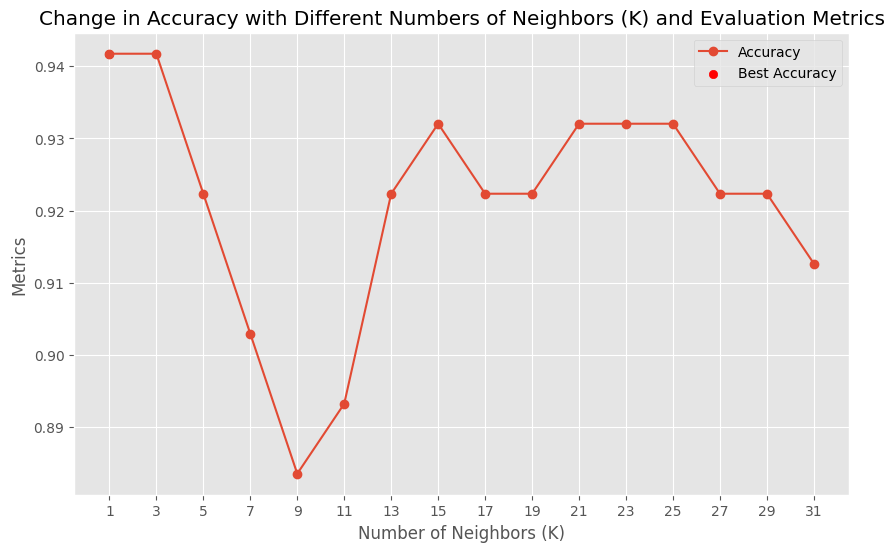

In [52]:
# Define a range of odd k values for KNN
k_values = range(1, 33, 2)  # Try odd values from 1 to 33 neighbors

# Initialize lists to store accuracy scores
knn_accuracies = []
y_pred_knn_list = []

# Iterate over different k values and calculate accuracy for each
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    knn_preds = knn.predict(X_test)
    accuracy = accuracy_score(y_test, knn_preds)
    knn_accuracies.append(accuracy)
    y_pred_knn_list.append(knn_preds)

# Plot the change in accuracy with different k values
plt.figure(figsize=(10, 6))
plt.plot(k_values, knn_accuracies, marker='o', linestyle='-', label='Accuracy')

# Add evaluation metrics for the best KNN model
best_k_idx = np.argmax(knn_accuracies)
best_k = k_values[best_k_idx]
best_accuracy = knn_accuracies[best_k_idx]
best_classification_report = classification_report(y_test, y_pred_knn_list[best_k_idx])

# Plot accuracy value
plt.scatter(best_k, best_accuracy, color='red', label='Best Accuracy')

plt.title('Change in Accuracy with Different Numbers of Neighbors (K) and Evaluation Metrics')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Metrics')
plt.xticks(k_values)
plt.legend()
plt.grid(True)
plt.show()

In [53]:
# Predicting labels for the training data
y_pred_train = knn.predict(X_train)

# Calculating training accuracy
training_accuracy = accuracy_score(y_train, y_pred_train)
print("Training Accuracy:", training_accuracy)

Training Accuracy: 0.9051094890510949


In [54]:
# Print evaluation metrics
print("\nK-Nearest Neighbors Classifier Performance:")
print("Best K:", best_k)
print("Accuracy:", best_accuracy)
print("Classification Report:")
print(best_classification_report)


K-Nearest Neighbors Classifier Performance:
Best K: 1
Accuracy: 0.941747572815534
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.89      0.94        57
           1       0.88      1.00      0.94        46

    accuracy                           0.94       103
   macro avg       0.94      0.95      0.94       103
weighted avg       0.95      0.94      0.94       103



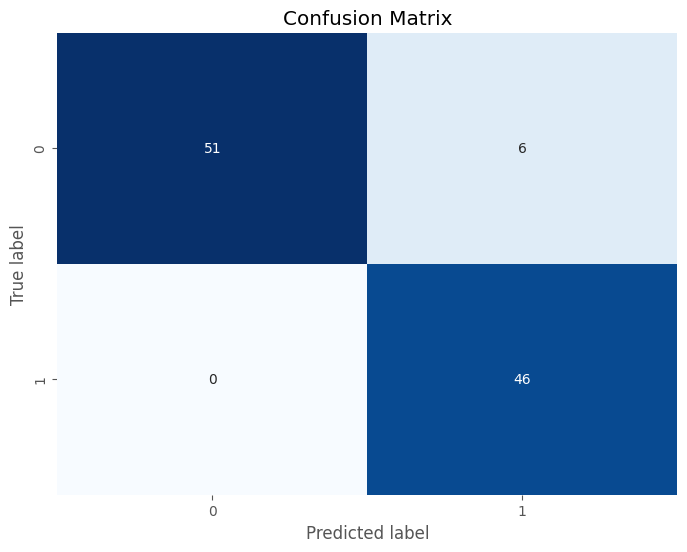

In [55]:
# Assuming y_test and y_pred are the true labels and predictions from the model
cm = confusion_matrix(y_test, y_pred_knn_list[best_k_idx])

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

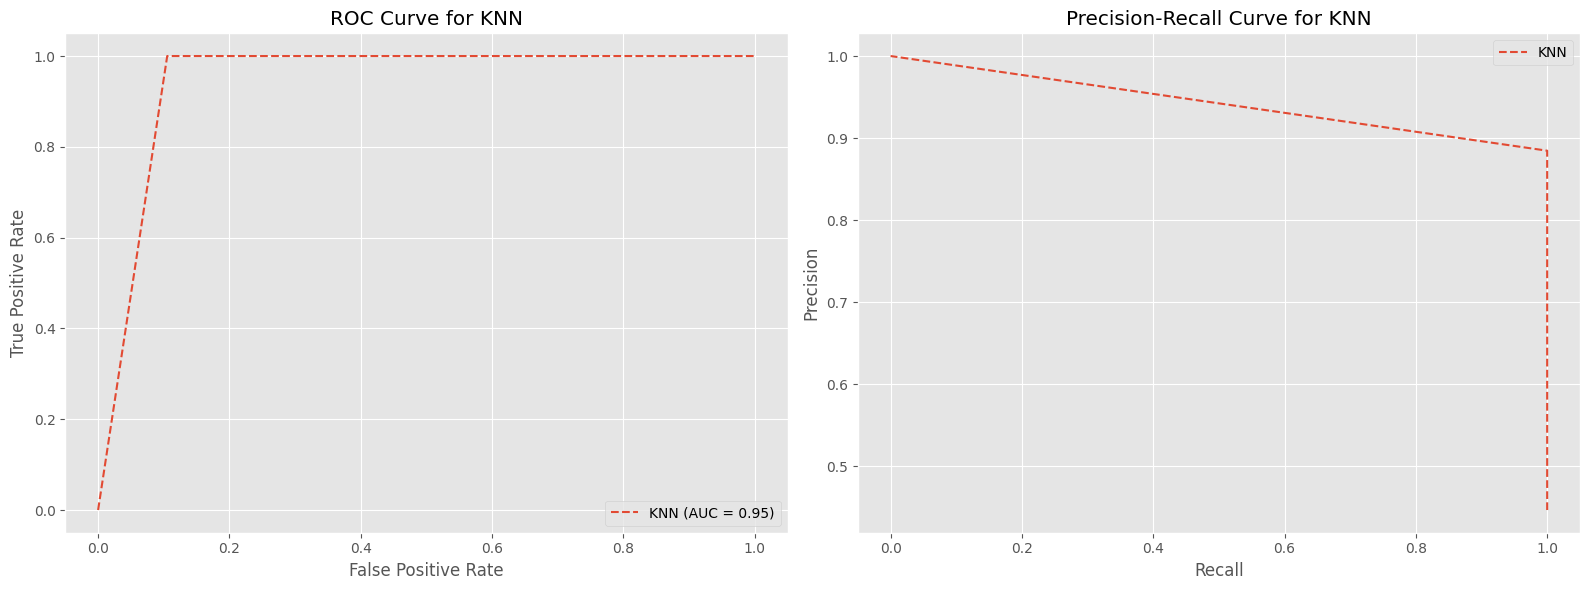

In [56]:
# Instantiate and train KNN classifier with the best k
knn_clf_best = KNeighborsClassifier(n_neighbors=best_k)
knn_clf_best.fit(X_train, y_train)

# Calculate probabilities for KNN
knn_probs = knn_clf_best.predict_proba(X_test)[:, 1]
knn_fpr, knn_tpr, _ = roc_curve(y_test, knn_probs)
knn_auc = roc_auc_score(y_test, knn_probs)

# Calculate Precision-Recall curve for KNN
knn_precision, knn_recall, _ = precision_recall_curve(y_test, knn_probs)

# Plot both ROC curve and Precision-Recall curve for KNN side by side
plt.figure(figsize=(16, 6))

# ROC curve subplot
plt.subplot(1, 2, 1)
plt.plot(knn_fpr, knn_tpr, linestyle='--', label=f'KNN (AUC = {knn_auc:.2f})')
plt.title('ROC Curve for KNN')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)

# Precision-Recall curve subplot
plt.subplot(1, 2, 2)
plt.plot(knn_recall, knn_precision, linestyle='--', label='KNN')
plt.title('Precision-Recall Curve for KNN')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

#### Grid Search

In [57]:
# Define the parameter grid to search over
param_grid = {
    'n_neighbors': [1,3, 5, 7, 9],  # Number of neighbors to consider
    'weights': ['uniform', 'distance'],  # Weight function used in prediction
    'metric': ['euclidean', 'manhattan']  # Distance metric
}

# Create the KNN classifier
knn_clf = KNeighborsClassifier()

# Create the grid search object
grid_search = GridSearchCV(knn_clf, param_grid, cv=5, scoring='accuracy')

# Train the grid search object (this will try all combinations of parameters)
grid_search.fit(X_train, y_train)

# Get the best parameters found during the grid search
best_params = grid_search.best_params_
print("Best parameters:", best_params)

# Get the best model found during the grid search
best_knn_clf = grid_search.best_estimator_

# Make predictions with the best model
y_pred_knn = best_knn_clf.predict(X_test)

Best parameters: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'distance'}


In [58]:
# Generate classification report
report = classification_report(y_test, y_pred_knn)
accuracy = accuracy_score(y_test, y_pred_knn)
print("Accuracy:", accuracy)
# Print the classification report
print("Classification Report:\n", report)

Accuracy: 0.912621359223301
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.84      0.91        57
           1       0.84      1.00      0.91        46

    accuracy                           0.91       103
   macro avg       0.92      0.92      0.91       103
weighted avg       0.93      0.91      0.91       103



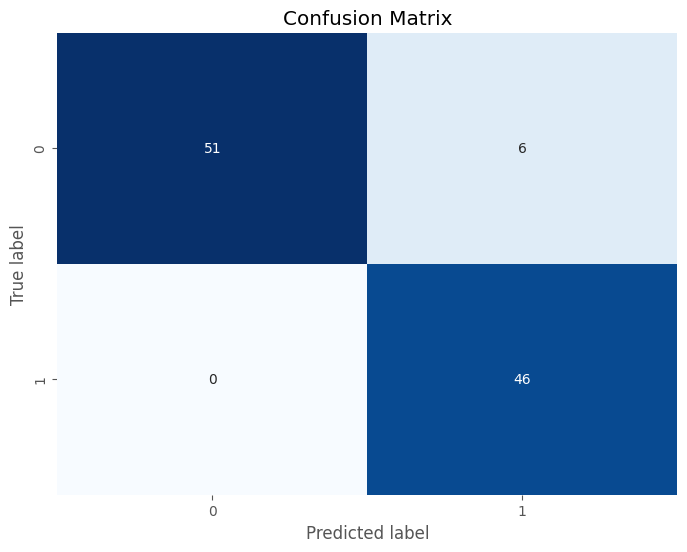

In [59]:
# Assuming y_test and y_pred are the true labels and predictions from the model
cm = confusion_matrix(y_test, y_pred_knn_list[best_k_idx])

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

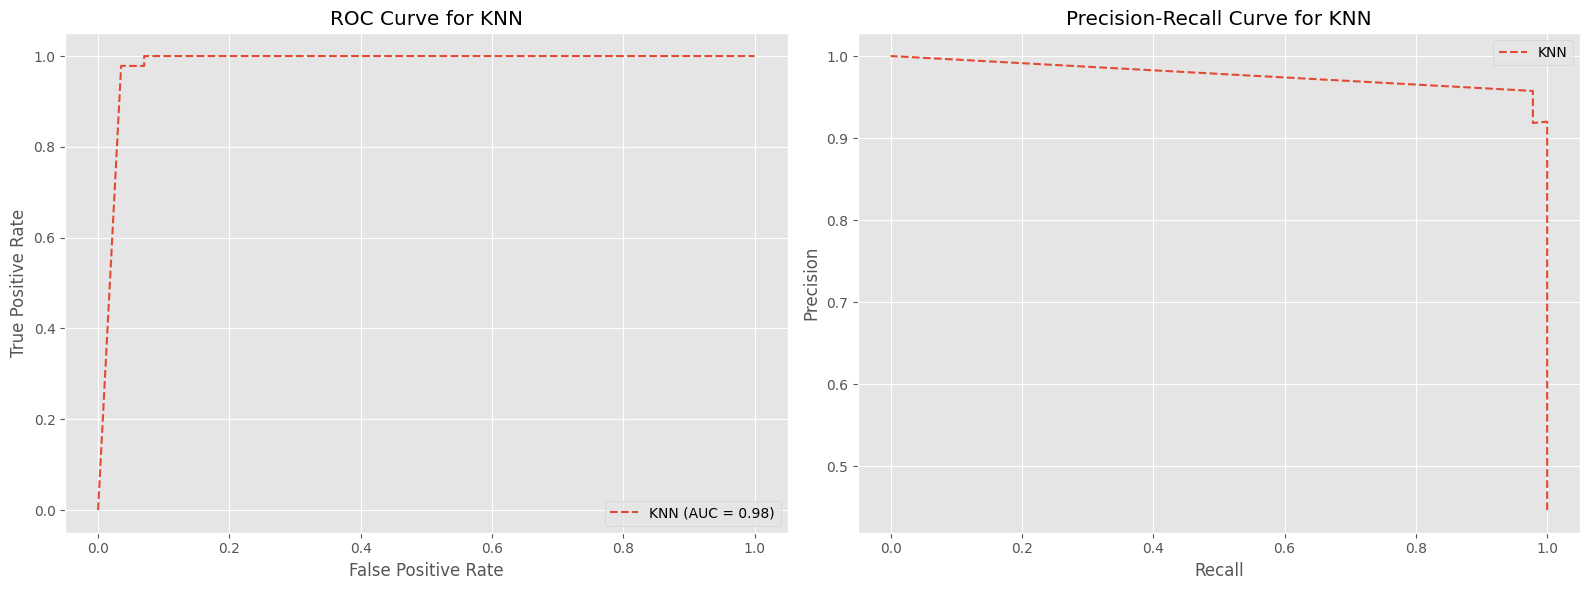

In [60]:
# Instantiate and train KNN classifier with the best k
knn_clf_best = KNeighborsClassifier(**best_params)
knn_clf_best.fit(X_train, y_train)

# Calculate probabilities for KNN
knn_probs = knn_clf_best.predict_proba(X_test)[:, 1]
knn_fpr, knn_tpr, _ = roc_curve(y_test, knn_probs)
knn_auc = roc_auc_score(y_test, knn_probs)

# Calculate Precision-Recall curve for KNN
knn_precision, knn_recall, _ = precision_recall_curve(y_test, knn_probs)

# Plot both ROC curve and Precision-Recall curve for KNN side by side
plt.figure(figsize=(16, 6))

# ROC curve subplot
plt.subplot(1, 2, 1)
plt.plot(knn_fpr, knn_tpr, linestyle='--', label=f'KNN (AUC = {knn_auc:.2f})')
plt.title('ROC Curve for KNN')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)

# Precision-Recall curve subplot
plt.subplot(1, 2, 2)
plt.plot(knn_recall, knn_precision, linestyle='--', label='KNN')
plt.title('Precision-Recall Curve for KNN')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Phase 2

##  3) Decision trees

### 3.1 Working with Balanced Dataset which grouping is applied on age and estimated salary 

In [61]:
# Split the data into features (X) and target variable (y)
X = balanced_data.drop('Purchased', axis=1)
y = balanced_data['Purchased']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [62]:
# Initialize the decision tree classifier
DT_clf = DecisionTreeClassifier(random_state=42)


# Train the decision tree classifier on the 'Purchased' column
DT_clf.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [63]:
# Predicting labels for the training data
y_pred_train = DT_clf.predict(X_train)

# Calculating training accuracy
training_accuracy = accuracy_score(y_train, y_pred_train)
print("Training Accuracy:", training_accuracy)

Training Accuracy: 0.9075425790754258


In [64]:
# Predict on the testing set
y_pred = DT_clf.predict(X_test)


# Generate classification report
report = classification_report(y_test, y_pred)
# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy) 
# Print the classification report
print("Classification Report:")
print(report)

Accuracy: 0.941747572815534
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.93      0.95        57
           1       0.92      0.96      0.94        46

    accuracy                           0.94       103
   macro avg       0.94      0.94      0.94       103
weighted avg       0.94      0.94      0.94       103



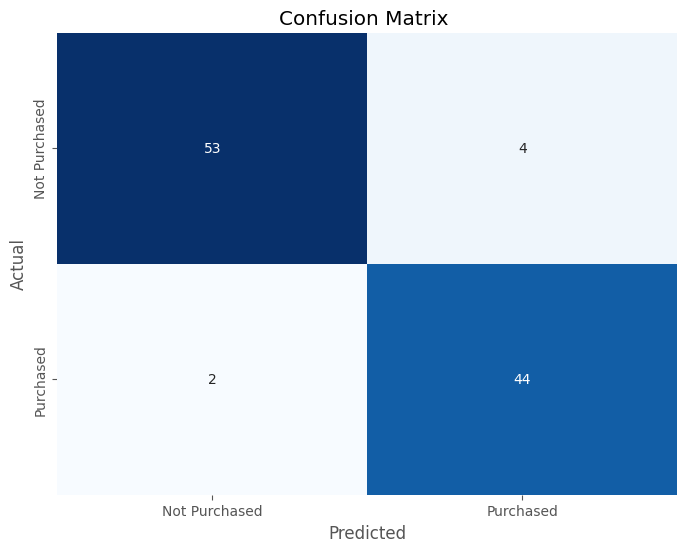

In [65]:
# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)

# Add labels, title, and ticks
plt.title('Confusion Matrix ')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks(ticks=[0.5, 1.5], labels=['Not Purchased', 'Purchased'])
plt.yticks(ticks=[0.5, 1.5], labels=['Not Purchased', 'Purchased'])

plt.show()

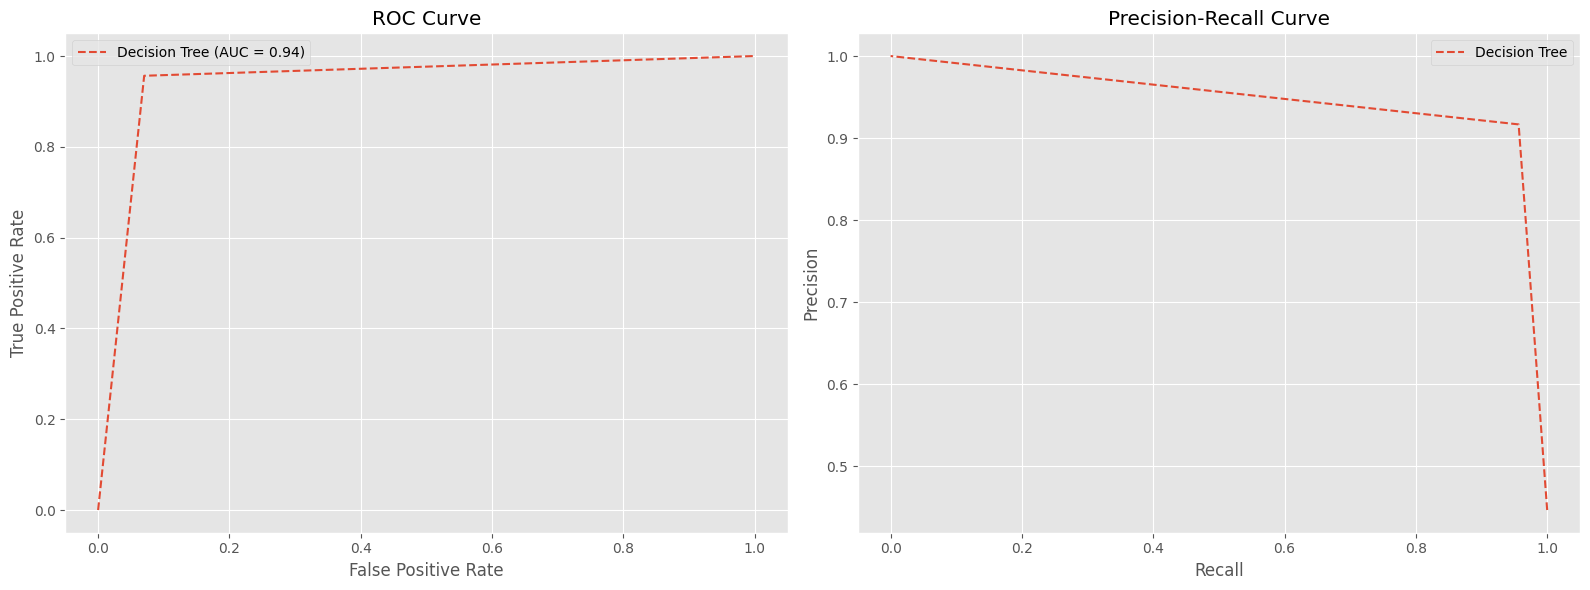

In [66]:
# Calculate ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)

# Plot ROC curve
plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, linestyle='--', label=f'Decision Tree (AUC = {auc:.2f})')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)

# Calculate Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test, y_pred)

# Plot Precision-Recall curve
plt.subplot(1, 2, 2)
plt.plot(recall, precision, linestyle='--', label='Decision Tree')
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

#### grid search 

In [67]:
# Define the parameter grid
param_grid = {
    'max_depth': [ 5,10, 20, 30,40,50],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10,15],   # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4,5]      # Minimum number of samples required to be at a leaf node
}
# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=DT_clf, param_grid=param_grid, cv=7, scoring='accuracy', verbose=1)

# Perform grid search
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Get the best estimator
best_clf = grid_search.best_estimator_

# Predict on the testing set with the best estimator
y_pred = best_clf.predict(X_test)

# Generate classification report
report = classification_report(y_test, y_pred)

# Print the classification report
print("Classification Report:")
print(report)

Fitting 7 folds for each of 96 candidates, totalling 672 fits
Best Parameters: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.93      0.95        57
           1       0.92      0.96      0.94        46

    accuracy                           0.94       103
   macro avg       0.94      0.94      0.94       103
weighted avg       0.94      0.94      0.94       103



<b> Gives the same result to without grid search</b>

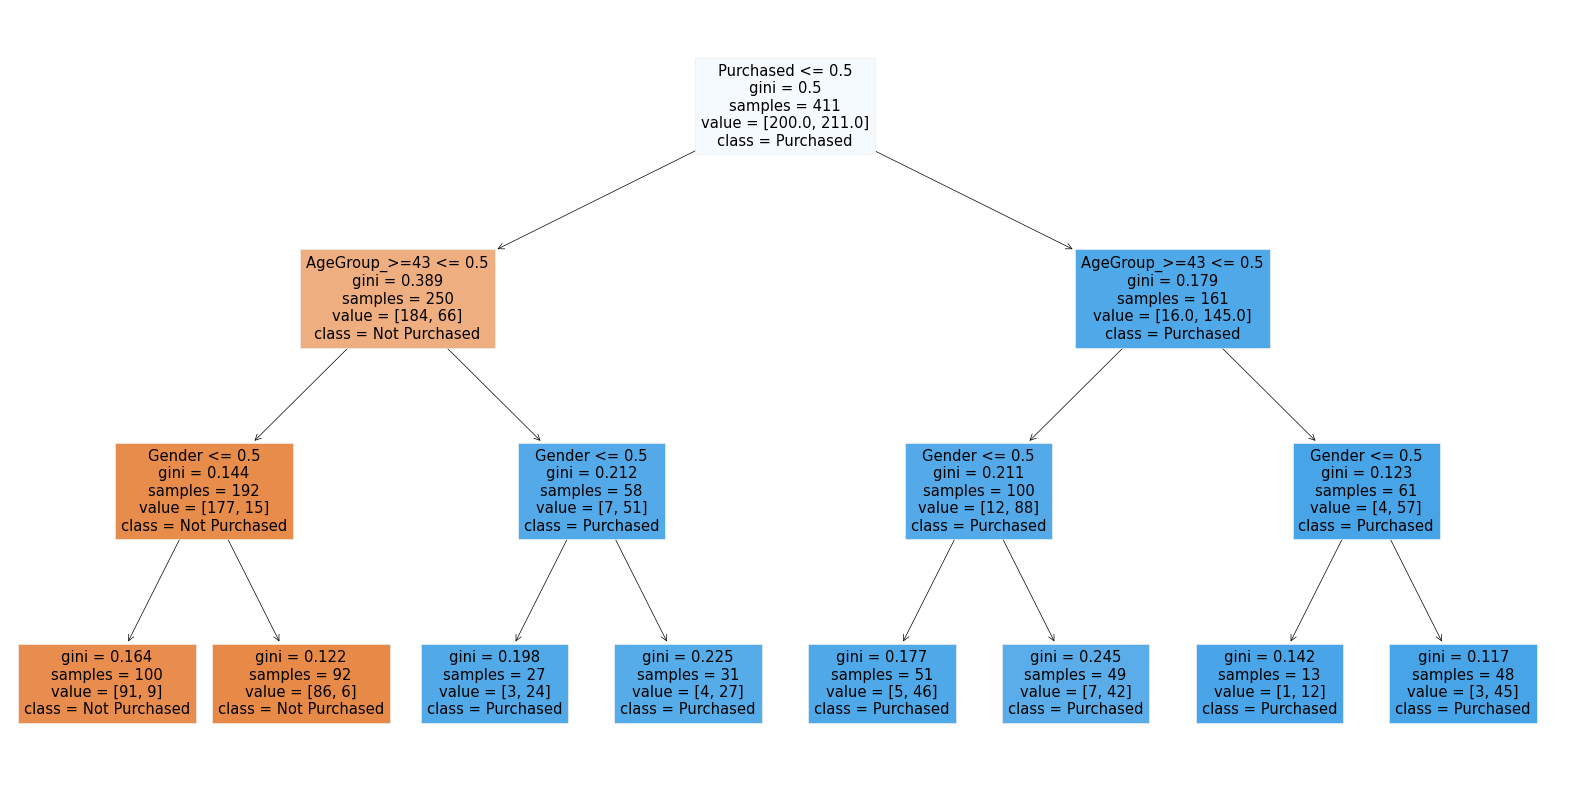

In [68]:
from sklearn.tree import plot_tree

# Define the feature names and class names
feature_names = balanced_data.columns[:-1]  # Exclude the target variable
class_names = ['Not Purchased', 'Purchased']

# Visualize the decision tree with the best parameters
plt.figure(figsize=(20, 10))
plot_tree(best_clf, filled=True, feature_names=feature_names, class_names=class_names)
plt.show()

When building a decision tree, the algorithm aims to minimize the Gini impurity at each node, as it selects the feature and split point that best separates the classes, leading to more homogeneous subsets.

Gini impurity is a measure of how often a randomly chosen element from the set would be incorrectly labeled if it was randomly labeled according to the distribution of labels in the subset. It is used in decision tree algorithms to evaluate how well a particular split separates the classes in the dataset.

In simpler terms, Gini impurity measures the degree of impurity or uncertainty in a dataset. A Gini impurity of 0 indicates that a node contains only samples from a single class, while a Gini impurity of 0.5 indicates that the samples are evenly distributed across all classes.

### 3.2 Working with Dataset which is normalized and balanced 

In [69]:
# Split the data into features (X) and target variable (y)
X = iphone_data_normalized.drop('Purchased', axis=1)
y = iphone_data_normalized['Purchased']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [70]:
# Initialize the decision tree classifier
DT_clf = DecisionTreeClassifier(random_state=42)


# Train the decision tree classifier on the 'Purchased' column
DT_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [71]:
# Predicting labels for the training data
y_pred_train = DT_clf.predict(X_train)

# Calculating training accuracy
training_accuracy = accuracy_score(y_train, y_pred_train)
print("Training Accuracy:", training_accuracy)

Training Accuracy: 1.0


In [72]:
# Predict on the testing set
y_pred = DT_clf.predict(X_test)


# Generate classification report
report = classification_report(y_test, y_pred)
# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy) 
# Print the classification report
print("Classification Report:")
print(report)

Accuracy: 0.9223300970873787
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.86      0.92        57
           1       0.85      1.00      0.92        46

    accuracy                           0.92       103
   macro avg       0.93      0.93      0.92       103
weighted avg       0.93      0.92      0.92       103



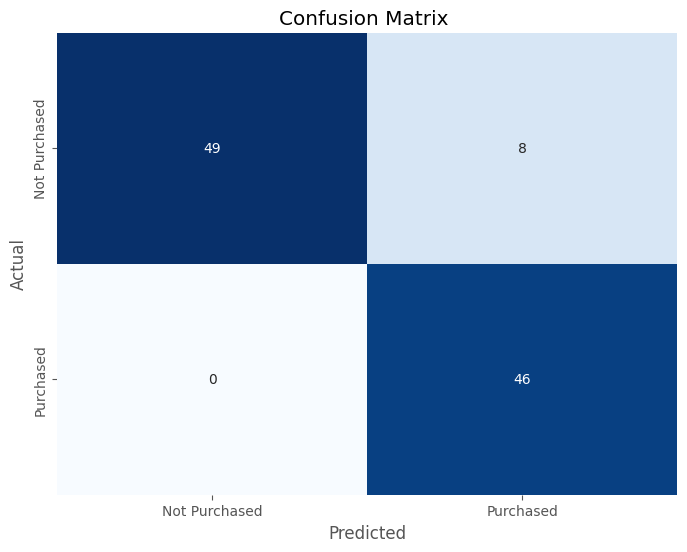

In [73]:
# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)

# Add labels, title, and ticks
plt.title('Confusion Matrix ')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks(ticks=[0.5, 1.5], labels=['Not Purchased', 'Purchased'])
plt.yticks(ticks=[0.5, 1.5], labels=['Not Purchased', 'Purchased'])

plt.show()

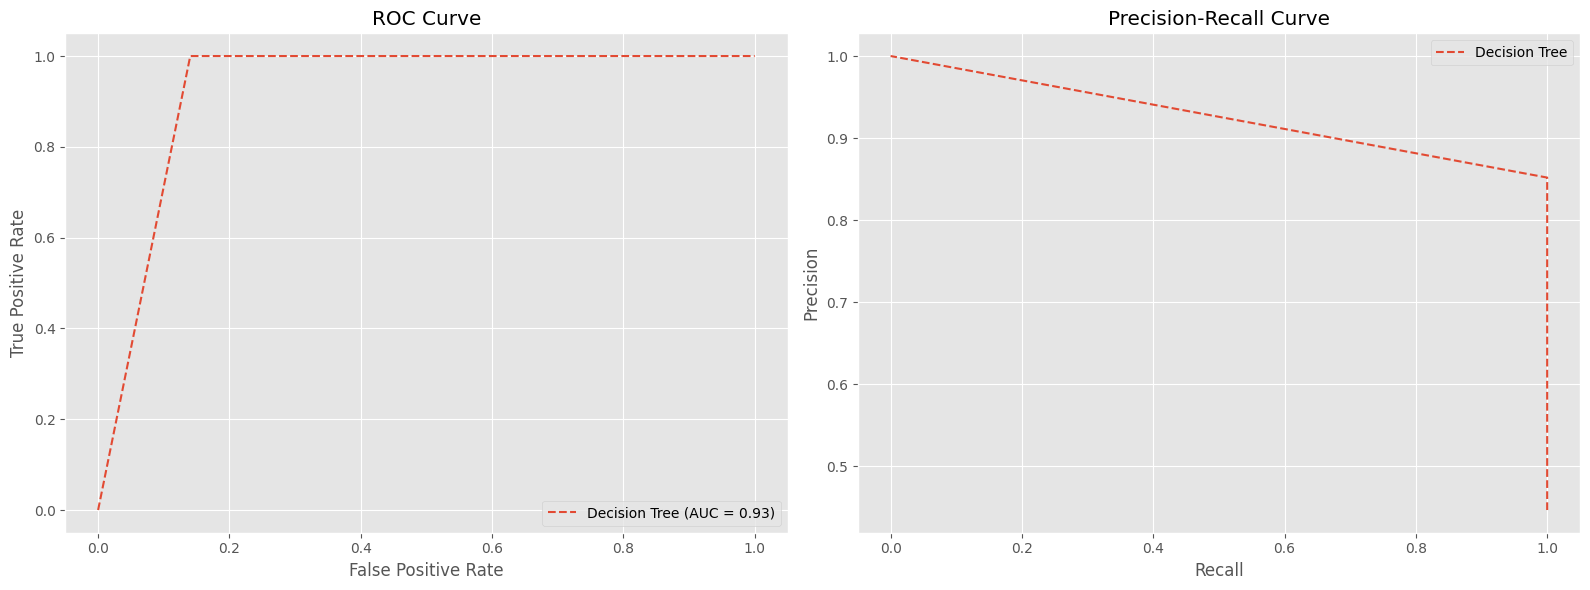

In [74]:
# Calculate ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)

# Plot ROC curve
plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, linestyle='--', label=f'Decision Tree (AUC = {auc:.2f})')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)

# Calculate Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test, y_pred)

# Plot Precision-Recall curve
plt.subplot(1, 2, 2)
plt.plot(recall, precision, linestyle='--', label='Decision Tree')
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [75]:
# Define the parameter grid
param_grid = {
    'max_depth': [ 5,10, 20, 30,40,50],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10,15],   # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4,5]      # Minimum number of samples required to be at a leaf node
}
# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=DT_clf, param_grid=param_grid, cv=7, scoring='accuracy', verbose=1)

# Perform grid search
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Get the best estimator
best_clf = grid_search.best_estimator_

# Predict on the testing set with the best estimator
y_pred = best_clf.predict(X_test)

# Generate classification report
report = classification_report(y_test, y_pred)

# Print the classification report
print("Classification Report:")
print(report)

Fitting 7 folds for each of 96 candidates, totalling 672 fits
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.88      0.93        57
           1       0.87      1.00      0.93        46

    accuracy                           0.93       103
   macro avg       0.93      0.94      0.93       103
weighted avg       0.94      0.93      0.93       103



In [76]:
# Predicting labels for the training data
y_pred_train = best_clf.predict(X_train)

# Calculating training accuracy
training_accuracy = accuracy_score(y_train, y_pred_train)
print("Training Accuracy:", training_accuracy)

Training Accuracy: 0.9951338199513382


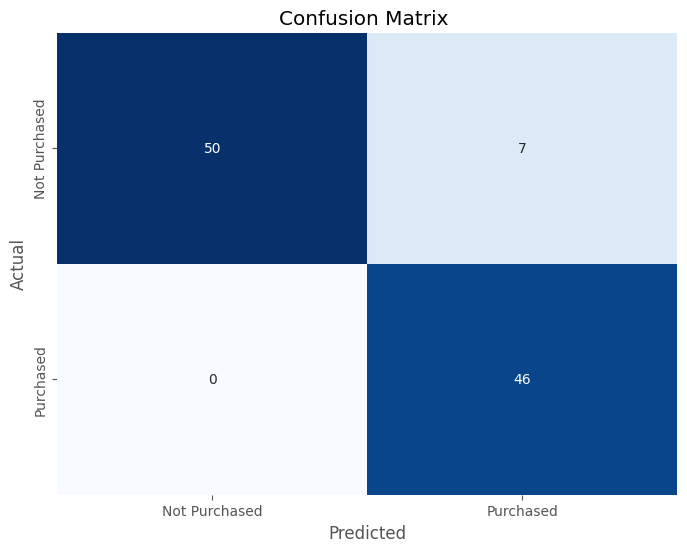

In [77]:
# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)

# Add labels, title, and ticks
plt.title('Confusion Matrix ')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks(ticks=[0.5, 1.5], labels=['Not Purchased', 'Purchased'])
plt.yticks(ticks=[0.5, 1.5], labels=['Not Purchased', 'Purchased'])

plt.show()

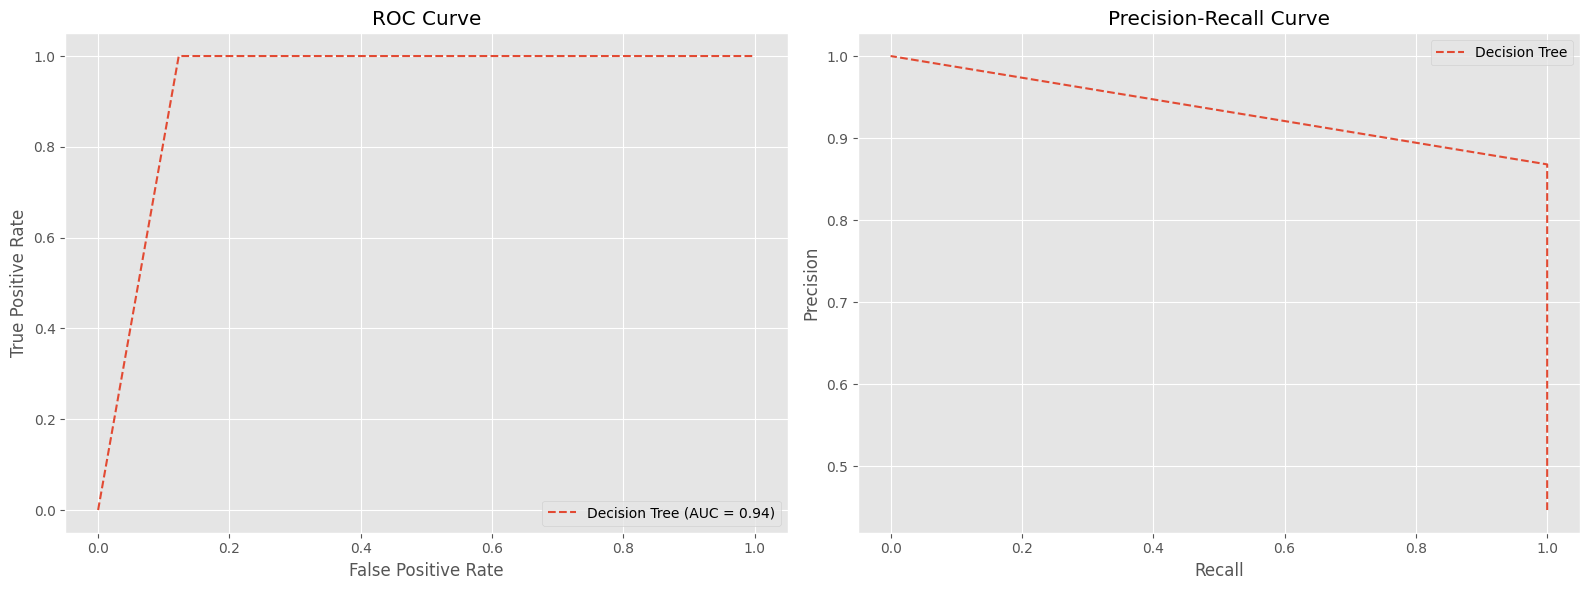

In [78]:
# Calculate ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)

# Plot ROC curve
plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, linestyle='--', label=f'Decision Tree (AUC = {auc:.2f})')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)

# Calculate Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test, y_pred)

# Plot Precision-Recall curve
plt.subplot(1, 2, 2)
plt.plot(recall, precision, linestyle='--', label='Decision Tree')
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

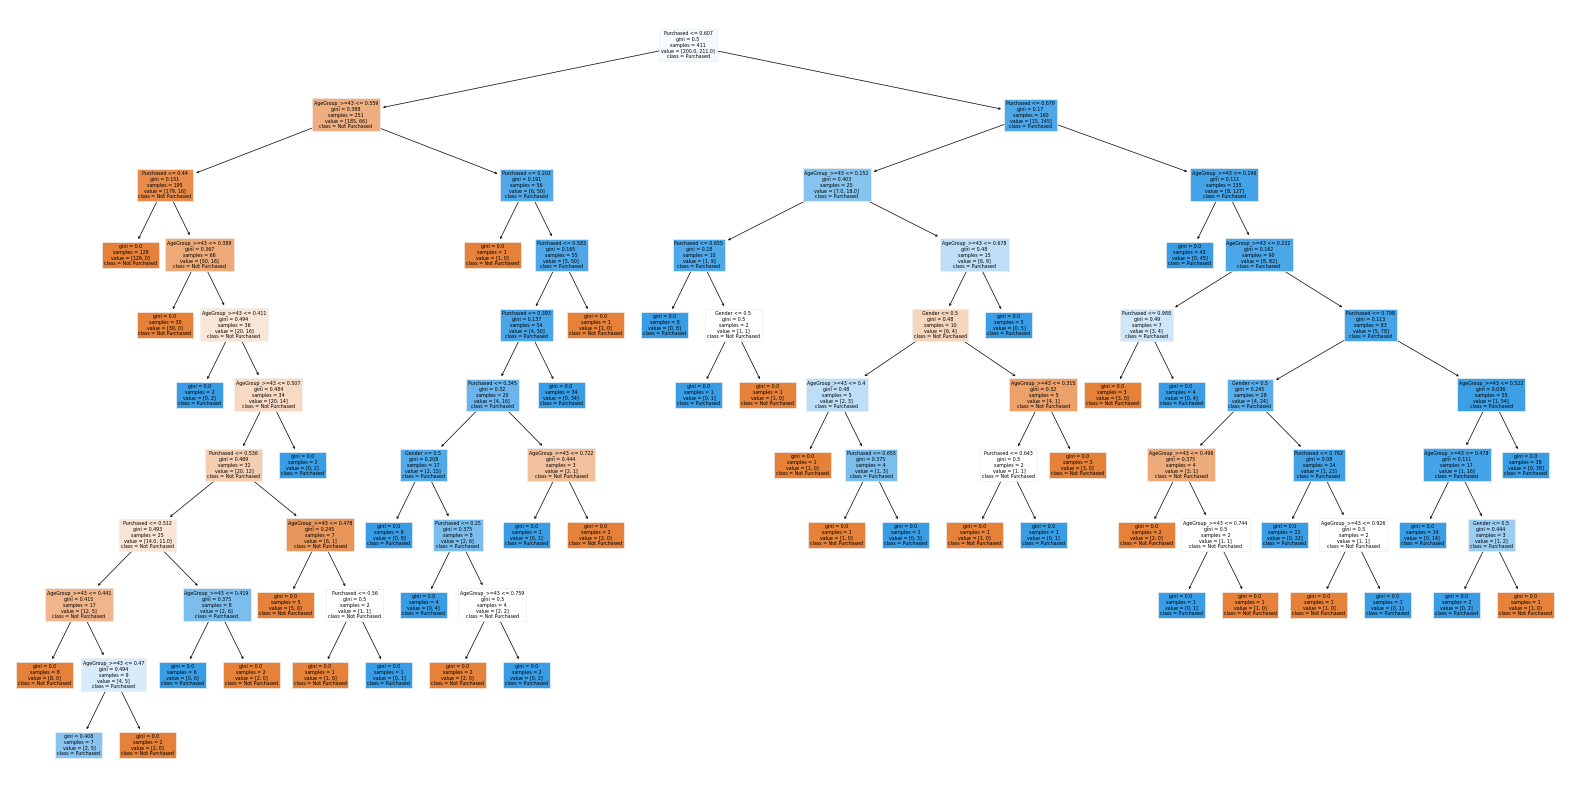

In [79]:
from sklearn.tree import plot_tree

# Define the feature names and class names
feature_names = balanced_data.columns[:-1]  # Exclude the target variable
class_names = ['Not Purchased', 'Purchased']

# Visualize the decision tree with the best parameters
plt.figure(figsize=(20, 10))
plot_tree(best_clf, filled=True, feature_names=feature_names, class_names=class_names)
plt.show()

## 4) Multilayer Perceptron


### 4.1 Working with Balanced Dataset which grouping is applied on age and estimated salary 

In [80]:
# Split the data into features (X) and target variable (y)
X = balanced_data.drop('Purchased', axis=1)
y = balanced_data['Purchased']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [81]:
# Initialize the MLP classifier
mlp = MLPClassifier(hidden_layer_sizes=(64, 64), activation='relu', solver='sgd', alpha=0.0001,batch_size=32,random_state=42)

# Train the classifier
mlp.fit(X_train, y_train)


MLPClassifier(batch_size=32, hidden_layer_sizes=(64, 64), random_state=42,
              solver='sgd')

In [82]:
# Predicting labels for the training data
y_pred_train = mlp.predict(X_train)

# Calculating training accuracy
training_accuracy = accuracy_score(y_train, y_pred_train)
print("Training Accuracy:", training_accuracy)

Training Accuracy: 0.9075425790754258


In [83]:
# Predict on the testing set
y_pred = mlp.predict(X_test)

# Generate classification report
report = classification_report(y_test, y_pred)
# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy) 
# Print the classification report
print("Classification Report:")
print(report)

Accuracy: 0.941747572815534
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.93      0.95        57
           1       0.92      0.96      0.94        46

    accuracy                           0.94       103
   macro avg       0.94      0.94      0.94       103
weighted avg       0.94      0.94      0.94       103



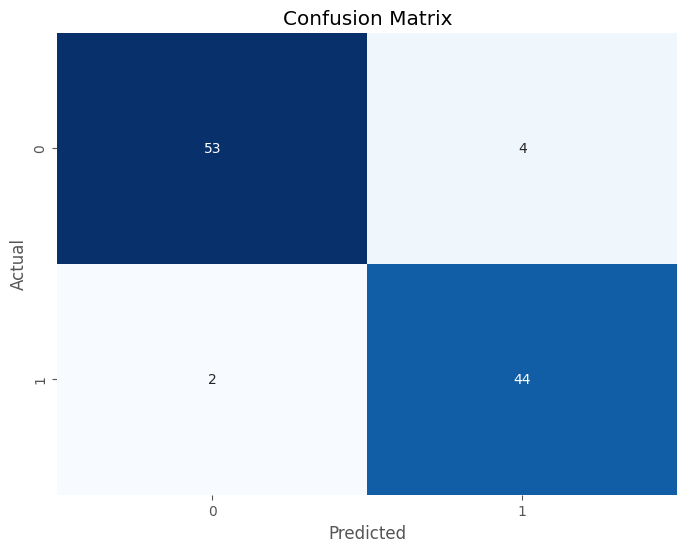

In [84]:
# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

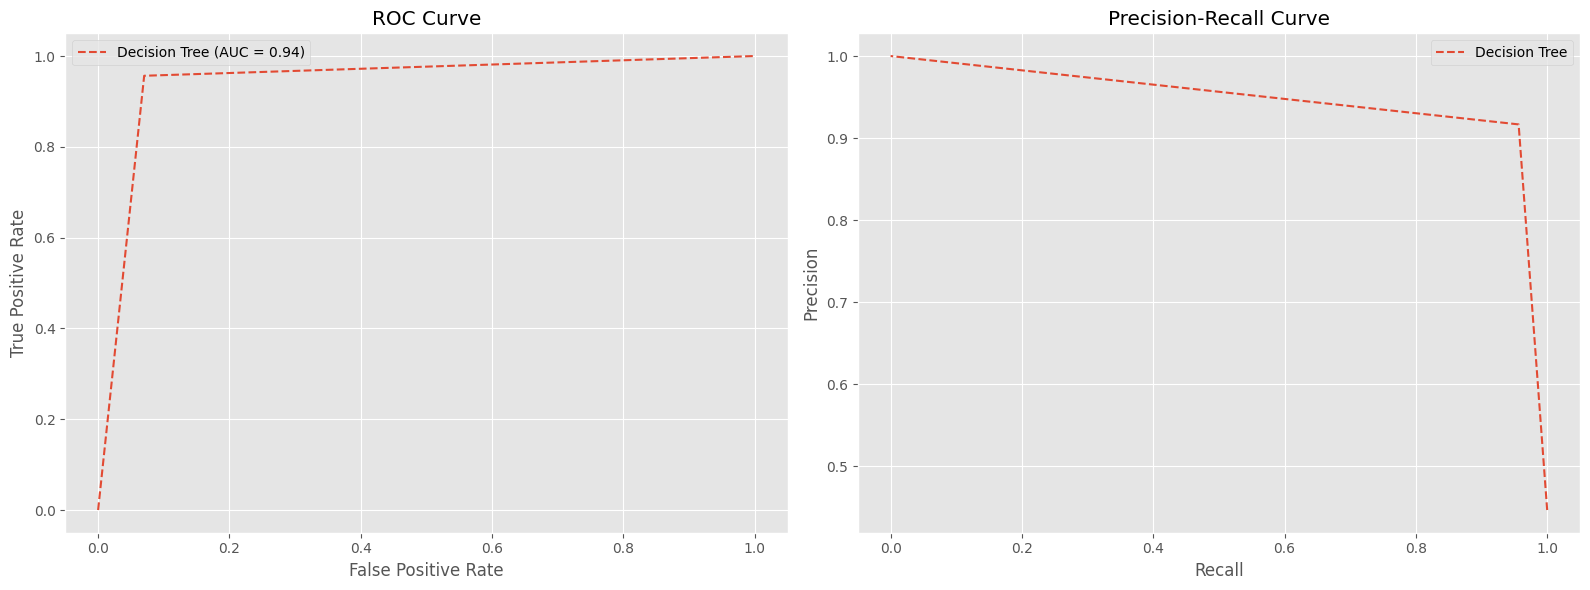

In [85]:
# Calculate ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)

# Plot ROC curve
plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, linestyle='--', label=f'Decision Tree (AUC = {auc:.2f})')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)

# Calculate Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test, y_pred)

# Plot Precision-Recall curve
plt.subplot(1, 2, 2)
plt.plot(recall, precision, linestyle='--', label='Decision Tree')
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

 the true positive rate (sensitivity) against the false positive rate <br>
 the model has excellent discrimination capability. The higher the AUC, the better the model is at distinguishing between positive and negative instances.<br>

 The model achieves high precision (low false positive rate) while maintaining high recall (low false negative rate). This indicates that the model can identify most of the positive instances correctly while minimizing false positives

#### MLP grid search

In [86]:
# Define the parameter grid
param_grid = {
    'hidden_layer_sizes': [(64, 64), (128, 128)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.001, 0.01],
    'batch_size': [32, 64]
}

# Initialize the MLP classifier
mlp = MLPClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=mlp, param_grid=param_grid, cv=7, scoring='accuracy', verbose=1)

# Perform grid search
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Get the best estimator
best_estimator = grid_search.best_estimator_

# Train the model with the best parameters
best_estimator.fit(X_train, y_train)


Fitting 7 folds for each of 48 candidates, totalling 336 fits
Best Parameters: {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 32, 'hidden_layer_sizes': (64, 64), 'solver': 'adam'}


MLPClassifier(batch_size=32, hidden_layer_sizes=(64, 64), random_state=42)

In [87]:
# Predicting labels for the training data
y_pred_train = best_estimator.predict(X_train)

# Calculating training accuracy
training_accuracy = accuracy_score(y_train, y_pred_train)
print("Training Accuracy:", training_accuracy)

Training Accuracy: 0.9075425790754258


In [88]:
# Predict on the test dataset
y_pred = best_estimator.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))



Test Accuracy: 0.941747572815534
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.93      0.95        57
           1       0.92      0.96      0.94        46

    accuracy                           0.94       103
   macro avg       0.94      0.94      0.94       103
weighted avg       0.94      0.94      0.94       103



### 4.2 Working with Dataset which is normalized and balanced 

In [89]:
# Split the data into features (X) and target variable (y)
X = iphone_data_normalized.drop('Purchased', axis=1)
y = iphone_data_normalized['Purchased']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [90]:
# Initialize the MLP classifier
mlp = MLPClassifier(hidden_layer_sizes=(64, 64), activation='relu', solver='sgd', alpha=0.0001,batch_size=32,random_state=42)

# Train the classifier
mlp.fit(X_train, y_train)

MLPClassifier(batch_size=32, hidden_layer_sizes=(64, 64), random_state=42,
              solver='sgd')

In [91]:
# Predicting labels for the training data
y_pred_train = mlp.predict(X_train)

# Calculating training accuracy
training_accuracy = accuracy_score(y_train, y_pred_train)
print("Training Accuracy:", training_accuracy)

Training Accuracy: 0.8637469586374696


In [92]:
# Predict on the testing set
y_pred = mlp.predict(X_test)

# Generate classification report
report = classification_report(y_test, y_pred)
# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy) 
# Print the classification report
print("Classification Report:")
print(report)

Accuracy: 0.8349514563106796
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.77      0.84        57
           1       0.76      0.91      0.83        46

    accuracy                           0.83       103
   macro avg       0.84      0.84      0.83       103
weighted avg       0.85      0.83      0.84       103



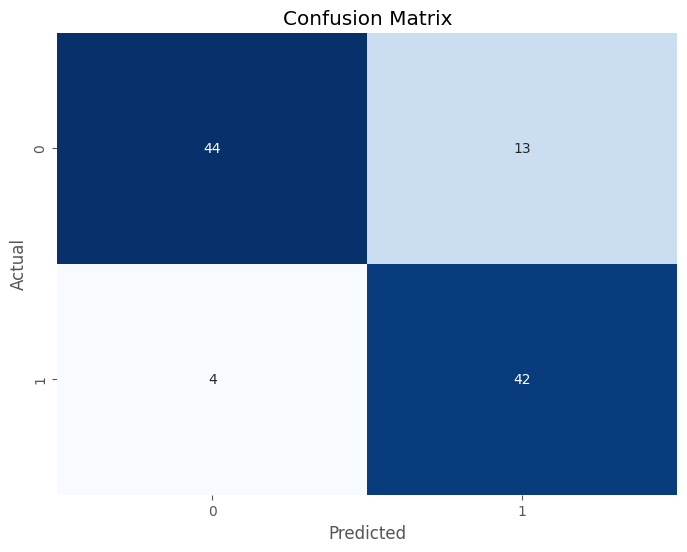

In [93]:
# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

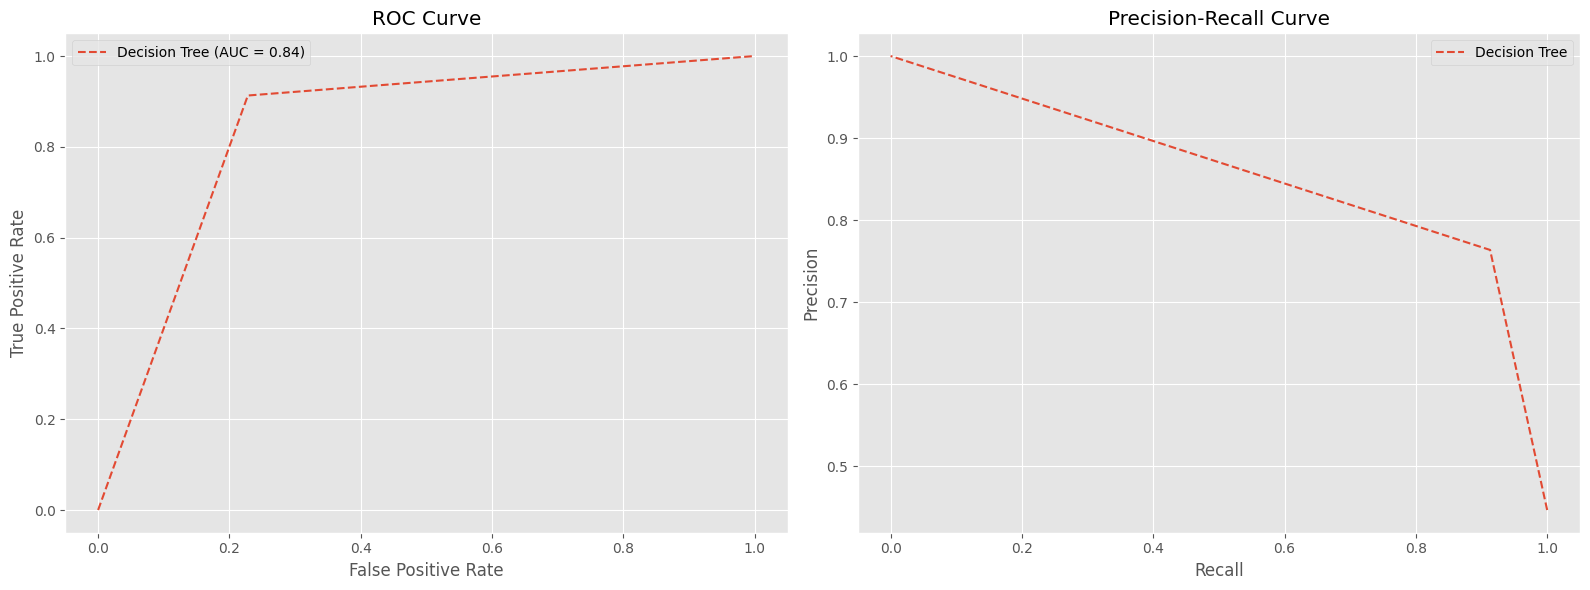

In [94]:
# Calculate ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)

# Plot ROC curve
plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, linestyle='--', label=f'Decision Tree (AUC = {auc:.2f})')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)

# Calculate Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test, y_pred)

# Plot Precision-Recall curve
plt.subplot(1, 2, 2)
plt.plot(recall, precision, linestyle='--', label='Decision Tree')
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [95]:
# Define the parameter grid
param_grid = {
    'hidden_layer_sizes': [(64, 64), (128, 128)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.001, 0.01],
    'batch_size': [32, 64]
}

# Initialize the MLP classifier
mlp = MLPClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=mlp, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1)

# Perform grid search
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Get the best estimator
best_estimator = grid_search.best_estimator_

# Train the model with the best parameters
best_estimator.fit(X_train, y_train)


Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best Parameters: {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 32, 'hidden_layer_sizes': (64, 64), 'solver': 'adam'}


MLPClassifier(batch_size=32, hidden_layer_sizes=(64, 64), random_state=42)

In [96]:
# Predicting labels for the training data
y_pred_train = best_estimator.predict(X_train)

# Calculating training accuracy
training_accuracy = accuracy_score(y_train, y_pred_train)
print("Training Accuracy:", training_accuracy)

Training Accuracy: 0.9075425790754258


In [97]:
# Predict on the test dataset
y_pred = best_estimator.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))



Test Accuracy: 0.9223300970873787
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.89      0.93        57
           1       0.88      0.96      0.92        46

    accuracy                           0.92       103
   macro avg       0.92      0.93      0.92       103
weighted avg       0.93      0.92      0.92       103



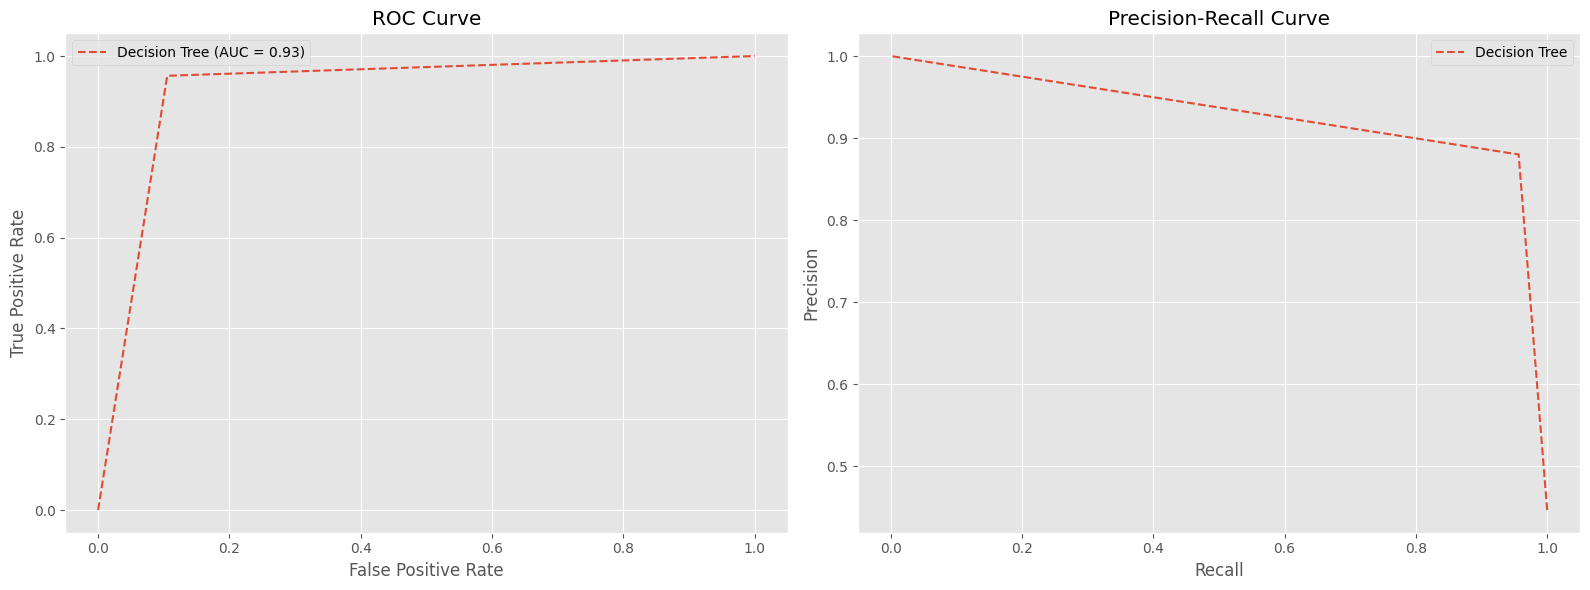

In [98]:
# Calculate ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)

# Plot ROC curve
plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, linestyle='--', label=f'Decision Tree (AUC = {auc:.2f})')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)

# Calculate Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test, y_pred)

# Plot Precision-Recall curve
plt.subplot(1, 2, 2)
plt.plot(recall, precision, linestyle='--', label='Decision Tree')
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


##  5) Support vector Machine

### 5.1 Working with Balanced Dataset which grouping is applied on age and estimated salary 

In [99]:
# Split the data into features (X) and target variable (y)
X = balanced_data.drop('Purchased', axis=1)
y = balanced_data['Purchased']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [100]:
# Initialize the SVM classifier
svm_classifier = SVC(C=10,kernel='poly',gamma=1, random_state=42)  # Linear kernel for simplicity, you can try other kernels as well

# Train the classifier
svm_classifier.fit(X_train, y_train)



SVC(C=10, gamma=1, kernel='poly', random_state=42)

In [101]:
# Predicting labels for the training data
y_pred_train = svm_classifier.predict(X_train)

# Calculating training accuracy
training_accuracy = accuracy_score(y_train, y_pred_train)
print("Training Accuracy:", training_accuracy)

Training Accuracy: 0.9075425790754258


In [102]:
# Predict on the testing set
y_pred = svm_classifier.predict(X_test)


# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Test Accuracy: 0.941747572815534
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.93      0.95        57
           1       0.92      0.96      0.94        46

    accuracy                           0.94       103
   macro avg       0.94      0.94      0.94       103
weighted avg       0.94      0.94      0.94       103



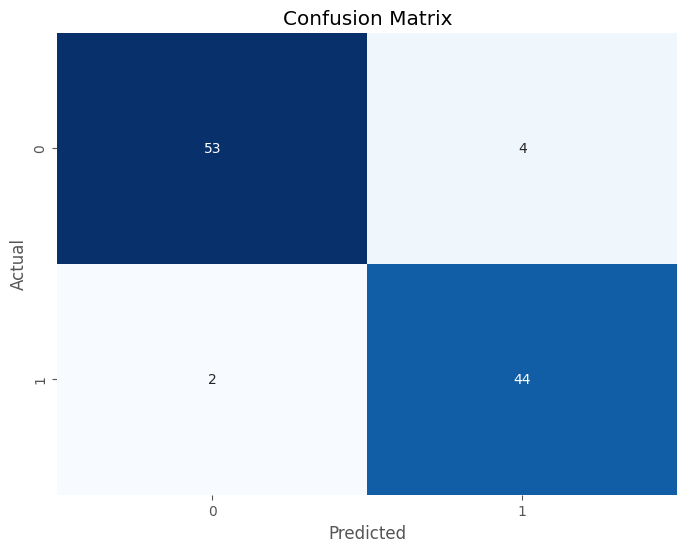

In [103]:
# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

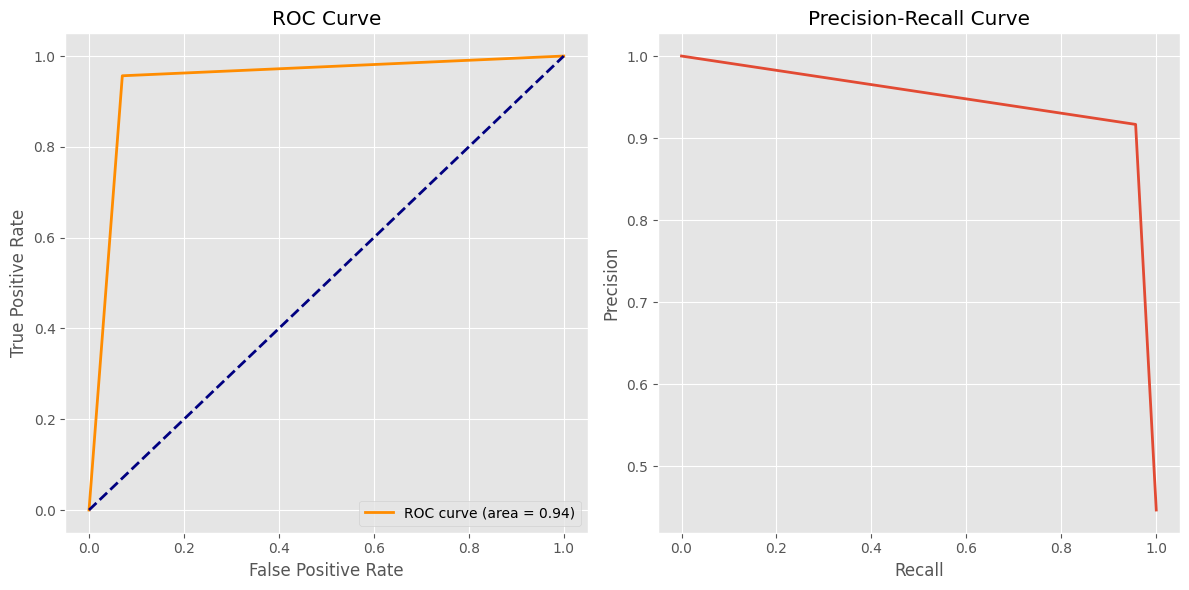

In [104]:
# Calculate ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

# Calculate Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test, y_pred)

# Plot both curves side by side
plt.figure(figsize=(12, 6))

# ROC curve
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')

# Precision-Recall curve
plt.subplot(1, 2, 2)
plt.plot(recall, precision, lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')

plt.tight_layout()
plt.show()

In [105]:
# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100,11,12,3,4,5,0.9],  # Regularization parameter
    'kernel': ['linear', 'rbf','poly'],  # Kernel type
    'gamma': [0.1, 1, 10, 100]  # Kernel coefficient for 'rbf' kernel
}

# Initialize the SVM classifier
svm_classifier = SVC(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=svm_classifier, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1)

# Perform grid search
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Get the best estimator
best_estimator = grid_search.best_estimator_

# Train the model with the best parameters
best_estimator.fit(X_train, y_train)

# Predict on the testing set
y_pred = best_estimator.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)

Fitting 5 folds for each of 120 candidates, totalling 600 fits
Best Parameters: {'C': 0.1, 'gamma': 0.1, 'kernel': 'linear'}
Test Accuracy: 0.941747572815534


<b> it gives the same result without grid search <br>

### 5.2 Working with Dataset which is normalized and balanced 

In [106]:
from sklearn.svm import SVC
# Split the data into features (X) and target variable (y)
X = iphone_data_normalized.drop('Purchased', axis=1)
y = iphone_data_normalized['Purchased']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [107]:
# Initialize the SVM classifier
svm_classifier = SVC(C=10,kernel='poly',gamma=1, random_state=42)  # Linear kernel for simplicity, you can try other kernels as well

# Train the classifier
svm_classifier.fit(X_train, y_train)


SVC(C=10, gamma=1, kernel='poly', random_state=42)

In [108]:
# Predicting labels for the training data
y_pred_train = svm_classifier.predict(X_train)

# Calculating training accuracy
training_accuracy = accuracy_score(y_train, y_pred_train)
print("Training Accuracy:", training_accuracy)

Training Accuracy: 0.8953771289537713


In [109]:
# Predict on the testing set
y_pred = svm_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Test Accuracy: 0.9223300970873787
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        57
           1       0.91      0.91      0.91        46

    accuracy                           0.92       103
   macro avg       0.92      0.92      0.92       103
weighted avg       0.92      0.92      0.92       103



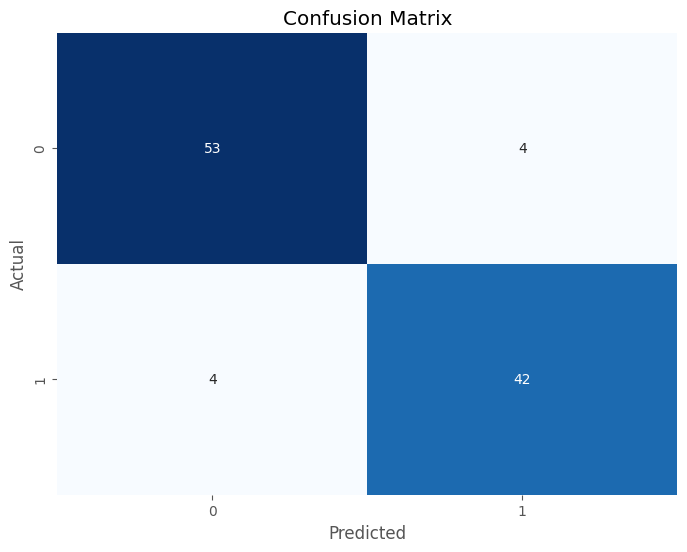

In [110]:
# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

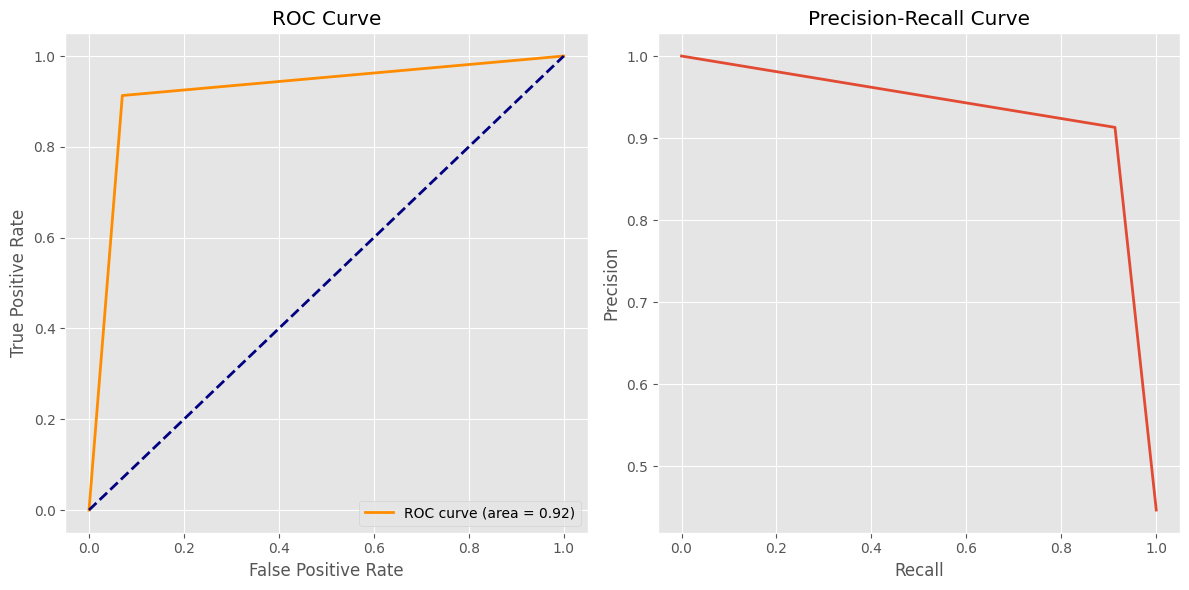

In [111]:
# Calculate ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

# Calculate Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test, y_pred)

# Plot both curves side by side
plt.figure(figsize=(12, 6))

# ROC curve
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')

# Precision-Recall curve
plt.subplot(1, 2, 2)
plt.plot(recall, precision, lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')

plt.tight_layout()
plt.show()

#### SVM grid Search

In [112]:
# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100,11,12,3,4,5,0.9],  # Regularization parameter
    'kernel': ['linear', 'rbf','poly'],  # Kernel type
    'gamma': [0.1, 1, 10, 100]  # Kernel coefficient for 'rbf' kernel
}

# Initialize the SVM classifier
svm_classifier = SVC(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=svm_classifier, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1)

# Perform grid search
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Get the best estimator
best_estimator = grid_search.best_estimator_

# Train the model with the best parameters
best_estimator.fit(X_train, y_train)

# Predict on the testing set
y_pred = best_estimator.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)


Fitting 5 folds for each of 120 candidates, totalling 600 fits
Best Parameters: {'C': 1, 'gamma': 100, 'kernel': 'rbf'}
Test Accuracy: 0.912621359223301


<b> It gives higher accuracy <b>

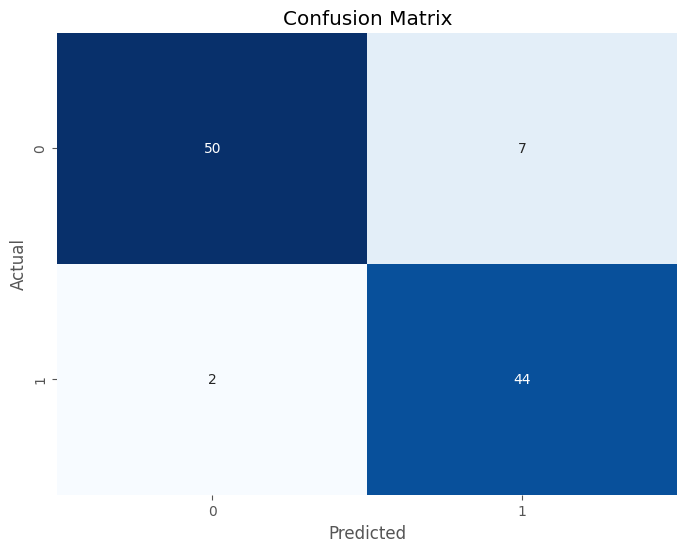

In [113]:
# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

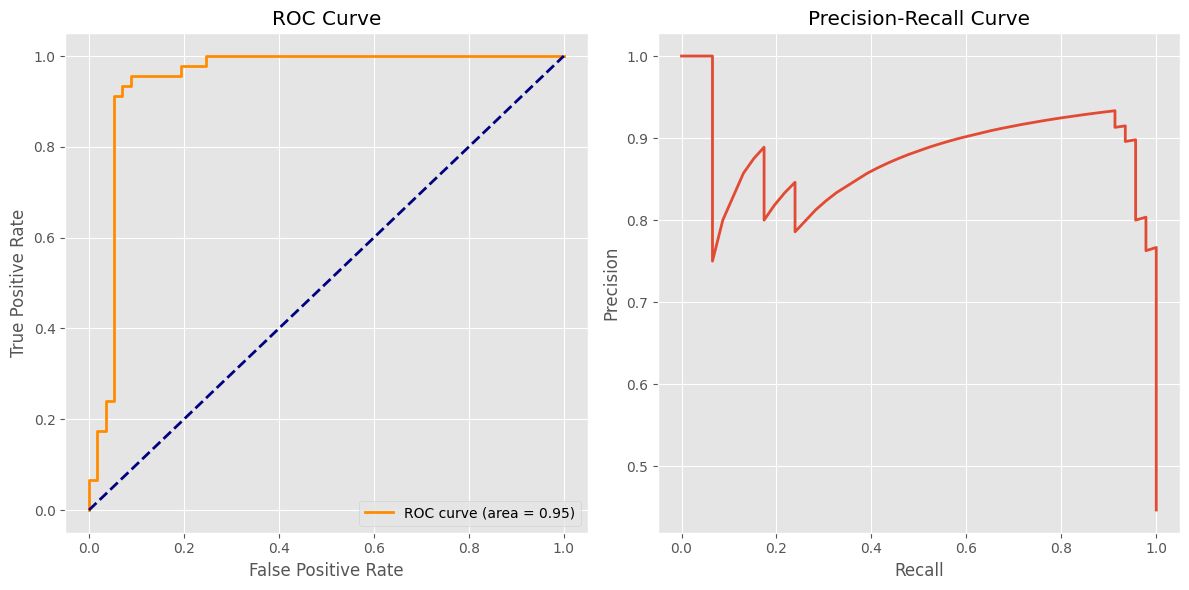

In [114]:
# Calculate decision function scores for SVM
decision_scores = best_estimator.decision_function(X_test)

# Calculate ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, decision_scores)
roc_auc = roc_auc_score(y_test, decision_scores)

# Calculate Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test, decision_scores)

# Plot both curves side by side
plt.figure(figsize=(12, 6))

# ROC curve
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')

# Precision-Recall curve
plt.subplot(1, 2, 2)
plt.plot(recall, precision, lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')

plt.tight_layout()
plt.show()
